## House Prices - Advanced Regression Techniques

Problem Statement: Your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

#

In [86]:
# Import 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option("display.max_columns" , None)

In [87]:
# Data-set
train_df = pd.read_csv("/Users/krushna/Downloads/house-prices-advanced-regression-techniques-2/train.csv")

In [88]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [89]:
# Missing Values
# Number of features with missing values 
features_with_null_values =  [features for features in train_df.columns if train_df[features].isnull().sum() > 1]

#percentage of values in the missing features 
for feature in features_with_null_values:
    print(feature, "=",np.round(train_df[feature].isnull().mean() , 4), '%' )

LotFrontage = 0.1774 %
Alley = 0.9377 %
MasVnrType = 0.5973 %
MasVnrArea = 0.0055 %
BsmtQual = 0.0253 %
BsmtCond = 0.0253 %
BsmtExposure = 0.026 %
BsmtFinType1 = 0.0253 %
BsmtFinType2 = 0.026 %
FireplaceQu = 0.4726 %
GarageType = 0.0555 %
GarageYrBlt = 0.0555 %
GarageFinish = 0.0555 %
GarageQual = 0.0555 %
GarageCond = 0.0555 %
PoolQC = 0.9952 %
Fence = 0.8075 %
MiscFeature = 0.963 %


#

Since we know there are missig values, Now we will find how these missing values are related to Target variable 

#

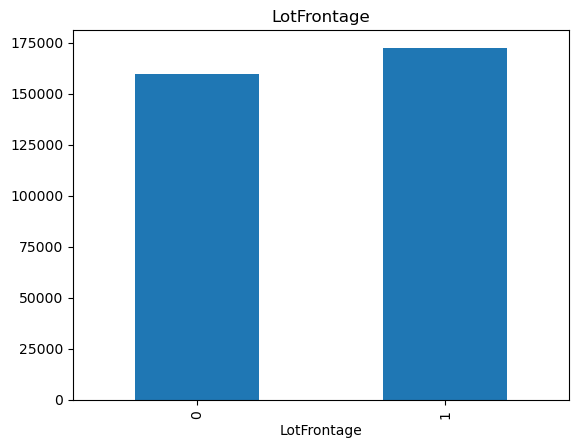

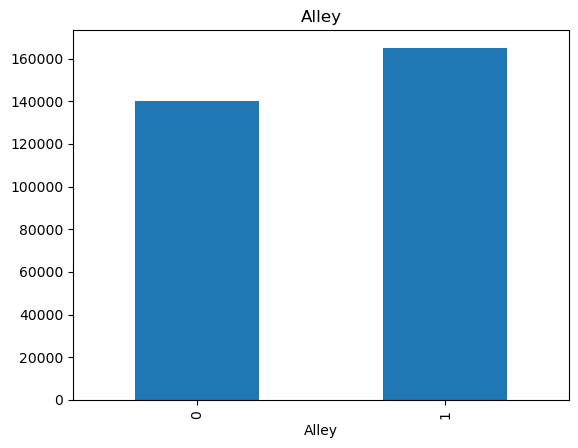

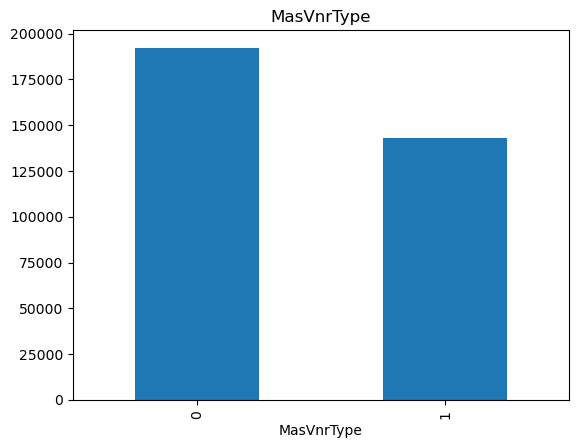

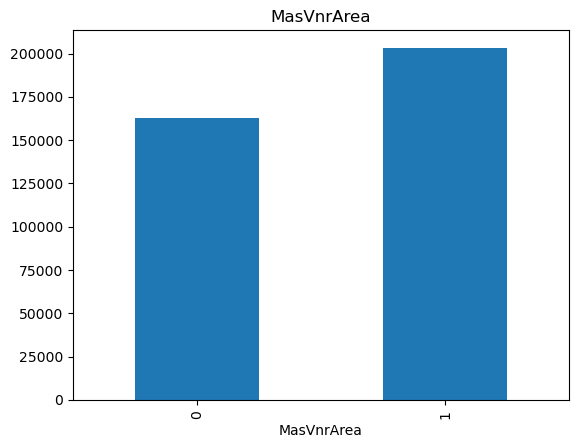

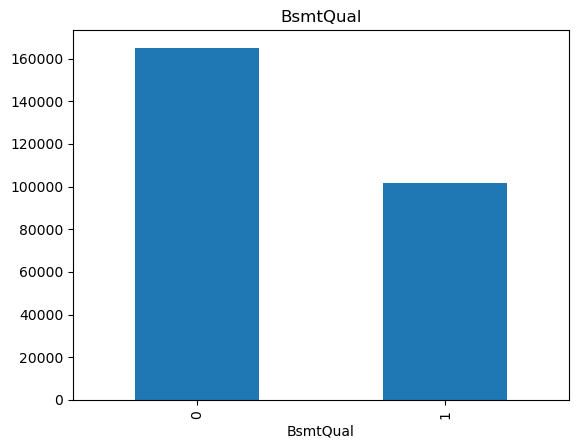

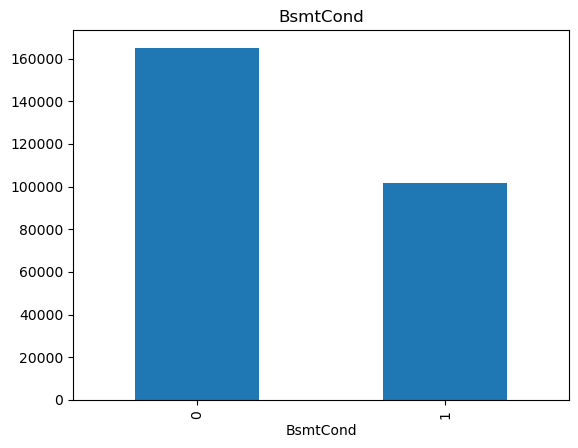

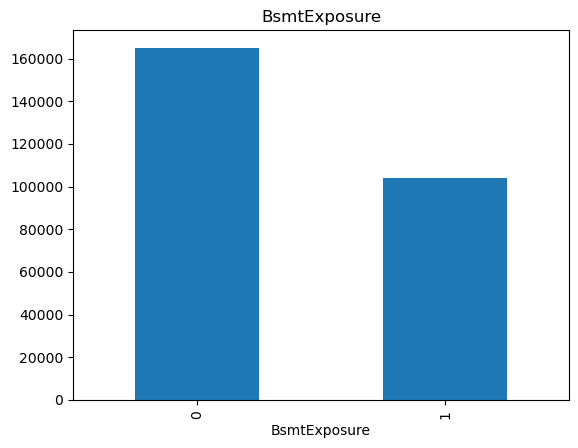

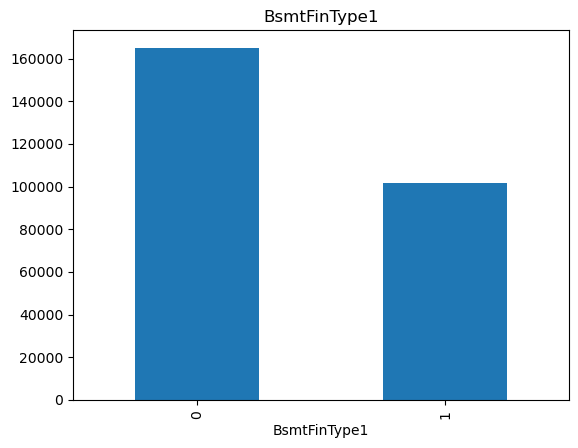

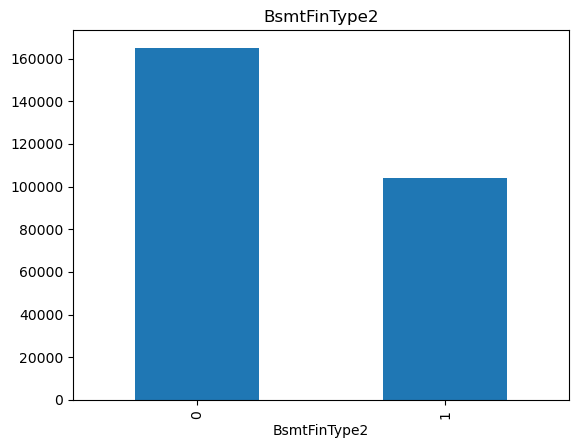

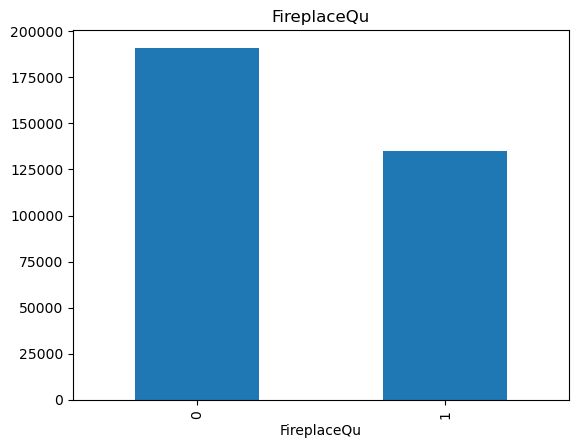

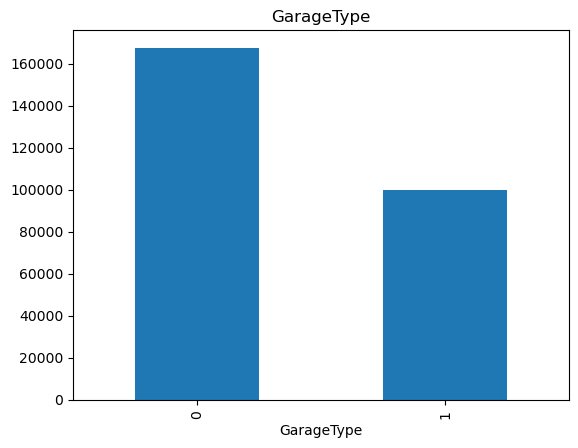

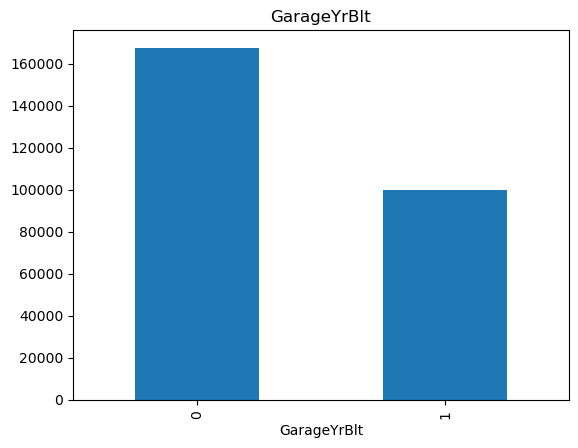

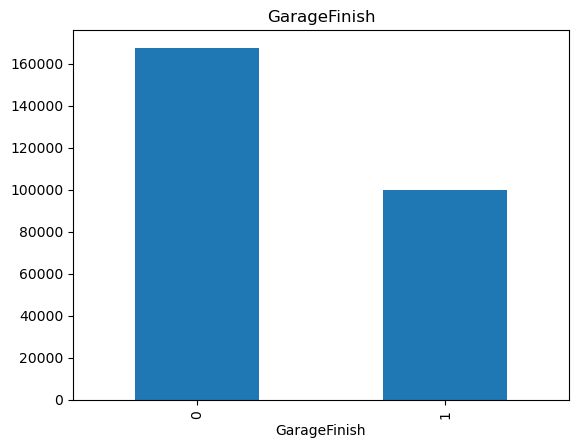

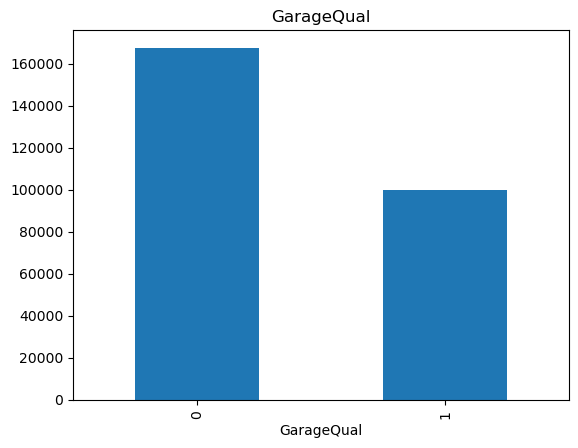

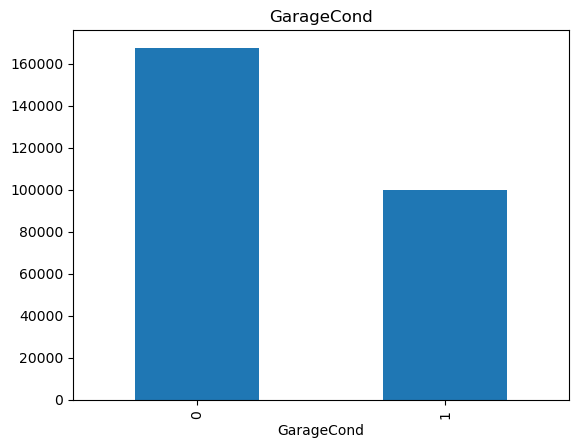

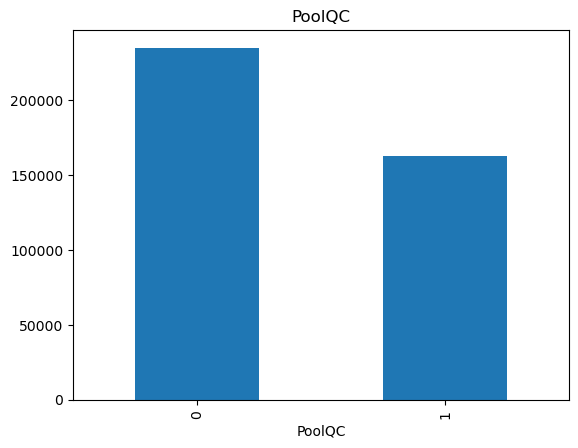

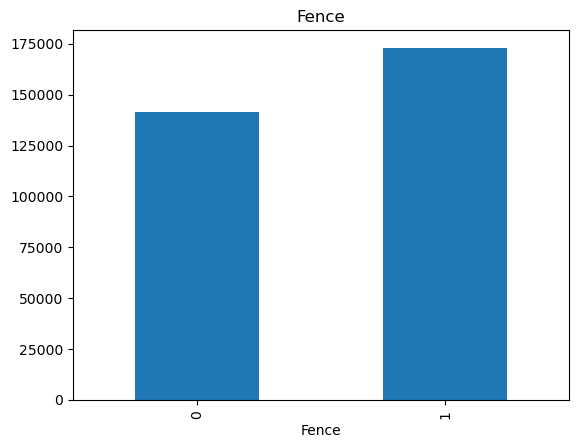

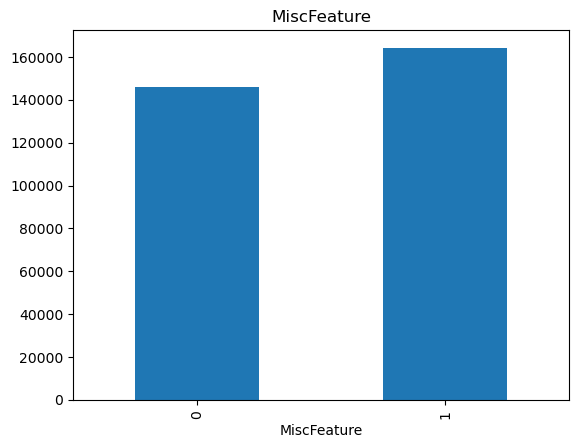

In [90]:
for features in features_with_null_values:
    data = train_df.copy()
    
    # if the data values are missing then indicate 1 
    # else 0
    data[features] = np.where(data[features].isnull(), 1, 0)
    
    # let's calculate the mean salesprice where the information is missing 
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(features)
    plt.show()

#

All these missing features are playing their role in predicitng SalesPrice. But these idea somwhat failed me to get the best visualize of my data. Therefore, let's make scatter plot.

#

In [91]:
# Numerical Variables 
numerical_features = [features for features in train_df.columns if train_df[features].dtypes != 'O']
print("Numerical Features = " ,len(numerical_features))

train_df[numerical_features].head()

Numerical Features =  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


Now we have total of 38 cols with numerical values. Let's settle DateTime cols.

DateTime can we done by differentiating with year based columns, finding unique values inside and visualize btw particular year and sales price

#

In [92]:
# Date Time Variables
year_features = [features for features in numerical_features if 'Yr' in features or 'Year'in features]
print(year_features,"\n")

for features in year_features:
    print(features, train_df[features].unique())
    print("\n")

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'] 

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]


YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


GarageYrBlt [2003. 1976. 2001. 1998.

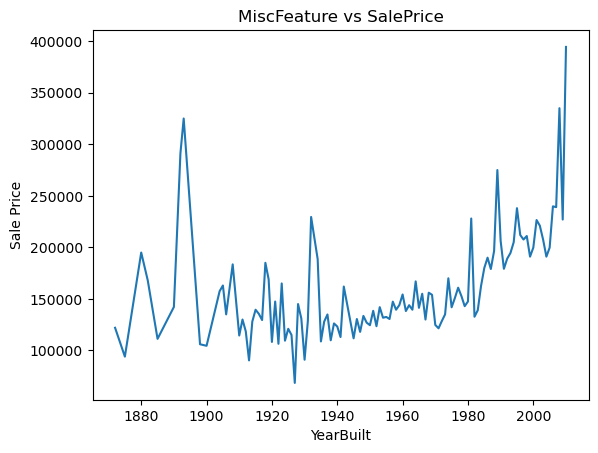

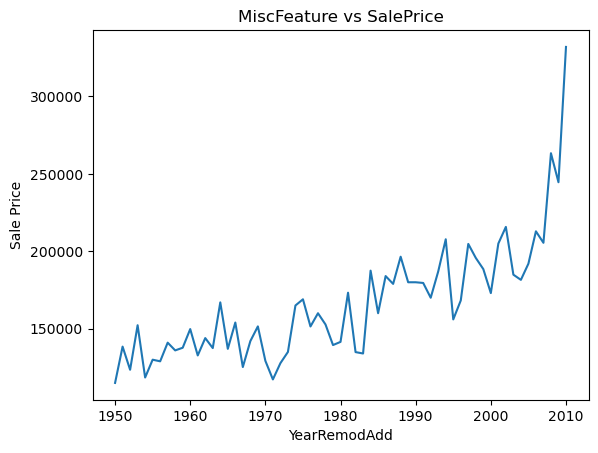

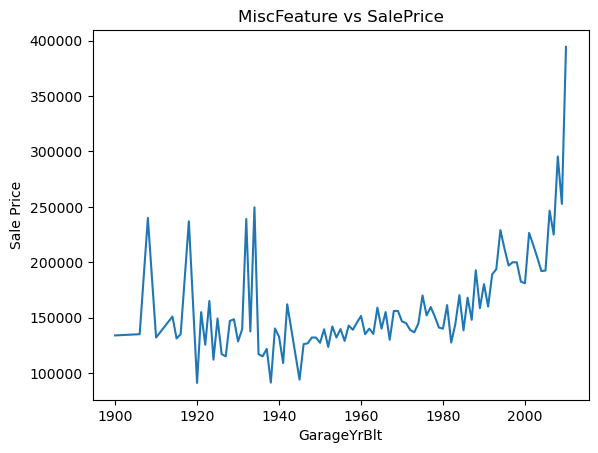

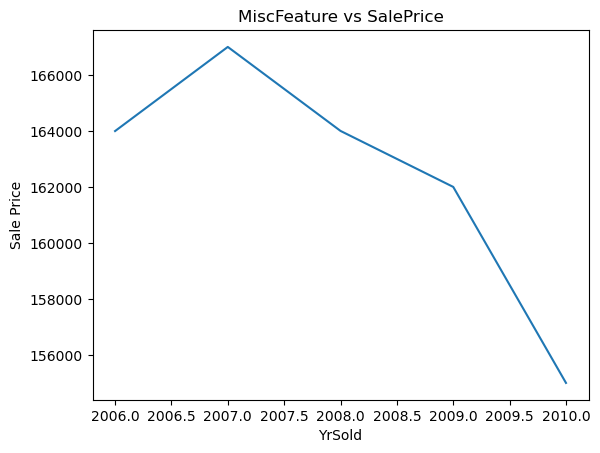

In [93]:
# Plotting 

for features in year_features:
    
    data  = train_df.copy()
    data.groupby(features)['SalePrice'].median().plot()
    plt.xlabel(features)
    plt.ylabel('Sale Price')
    plt.title(feature + " vs SalePrice") 
    plt.show()

From this we can see that the YrSold plays a great role in this dataset and from this we came to a point where, year Sold must be playing upside down rather than reality. As price is increasing as years are passing so sales price are dropping. To digest, this let's see house's birth date or year lived and changes with sales Price 

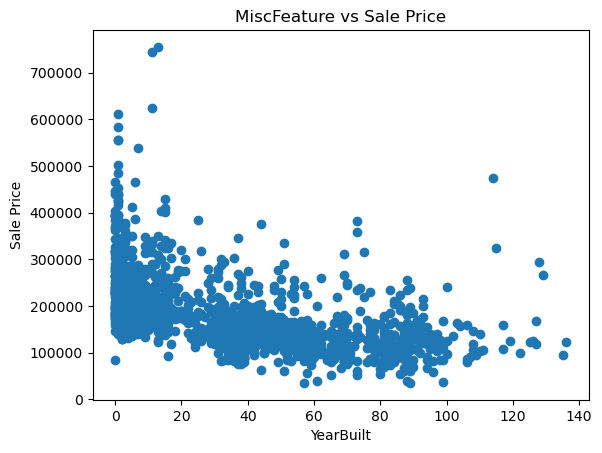

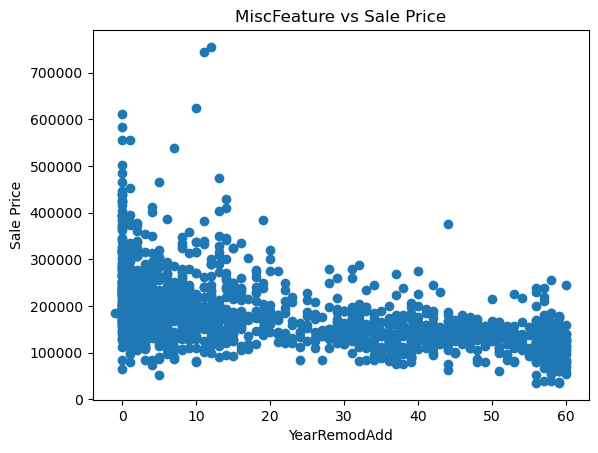

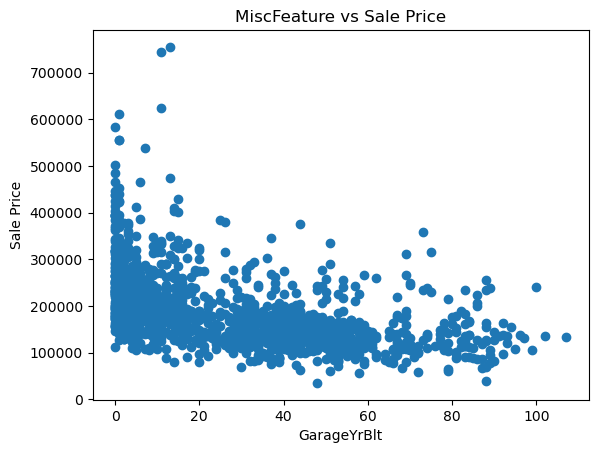

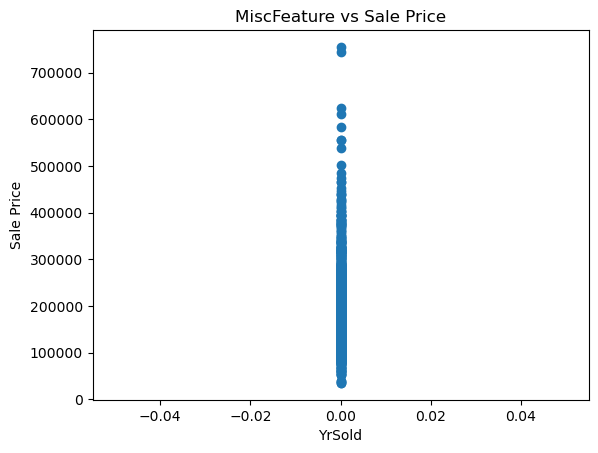

In [94]:
# Plotting House Lived and Sales Price

for features in year_features:
    data3 = train_df.copy()
    data3[features] = data3['YrSold'] - data3[features]
    
    plt.scatter(data3[features],data3['SalePrice'])
    plt.xlabel(features)
    plt.ylabel('Sale Price')
    plt.title(feature + ' vs Sale Price')
    plt.show()

    Conclude: As the years Build increases, the salePrice is dropped

              As the years renovated moves, the Sales Price drops

              As the garage gets older, the Sales Proce is dropped 

#

In [95]:
# Numerical Feature 
# Two Types: Discrete and Continous 
# Lets check how discrete make a change to Sales Price

descrete_features = [features for features in numerical_features if len(train_df[features].unique())<25 and features not in year_features +['Id']]
print("Total descrete_features: " , len(descrete_features))

Total descrete_features:  17


In [96]:
train_df[descrete_features].tail()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4
1459,20,5,6,0,1,0,1,1,3,1,6,0,1,0,0,0,6


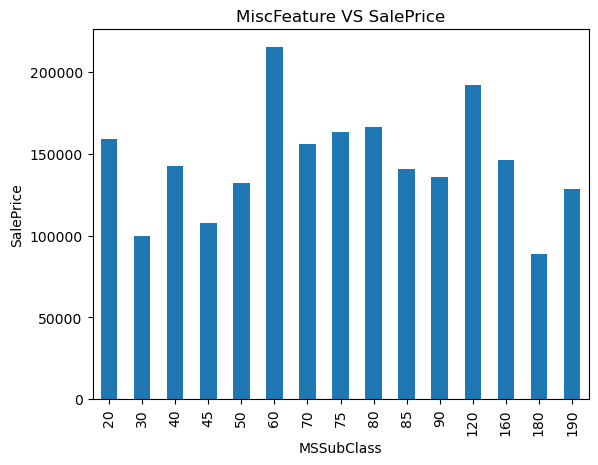

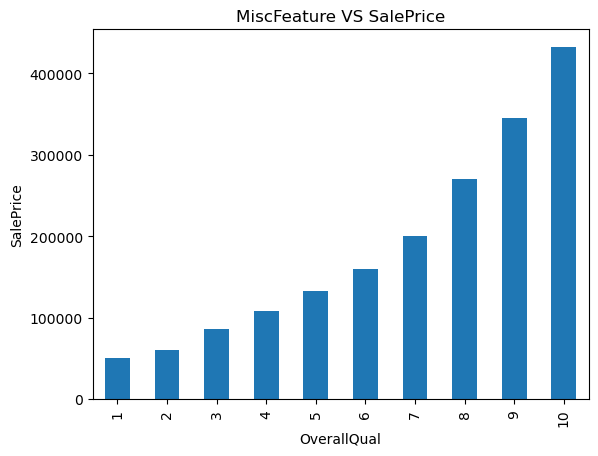

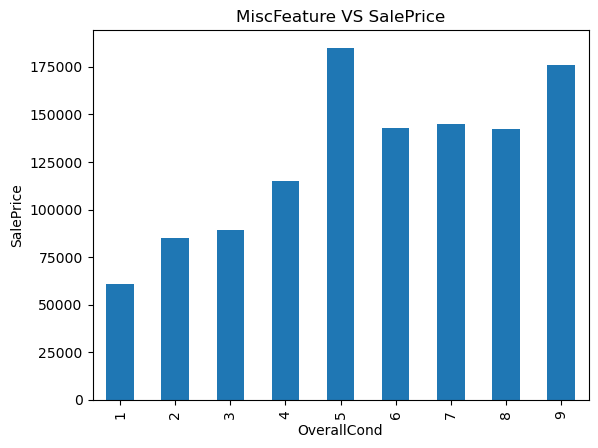

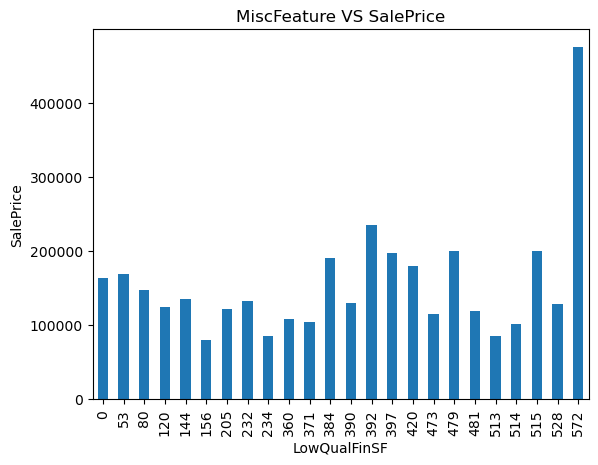

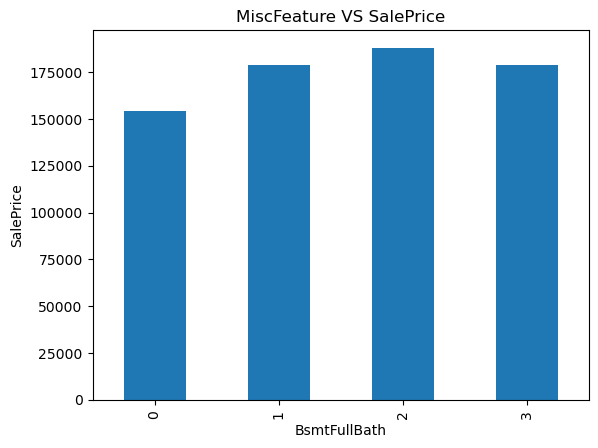

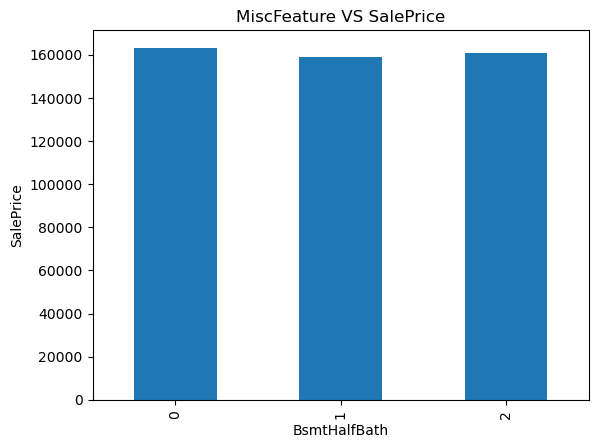

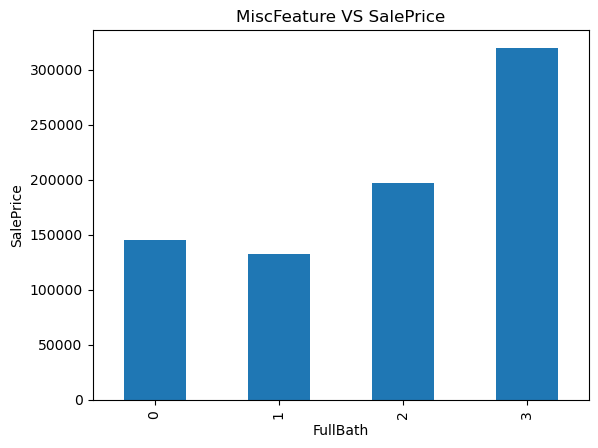

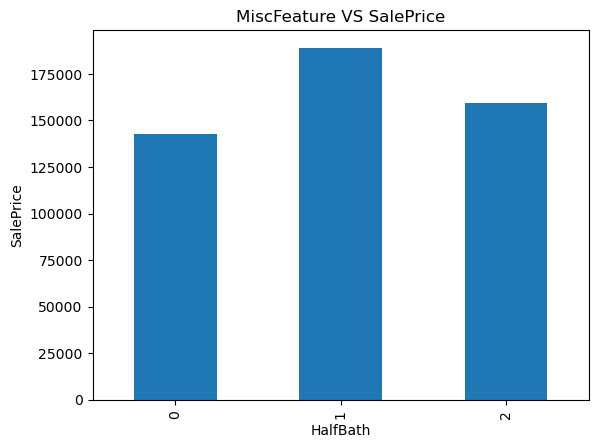

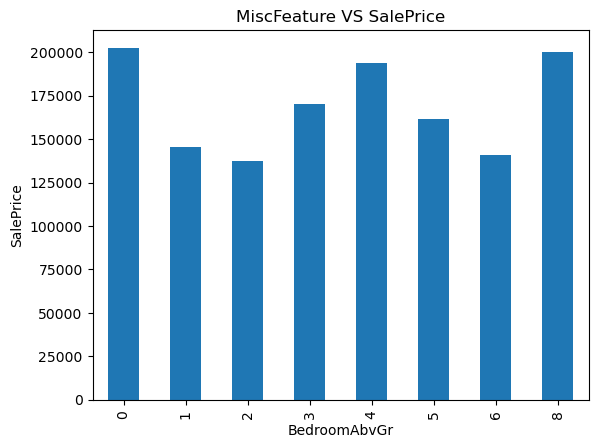

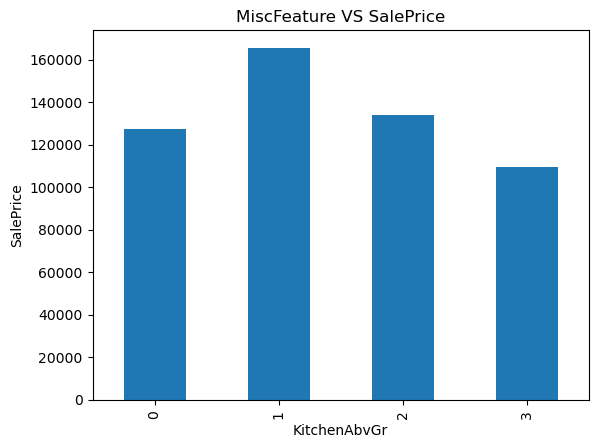

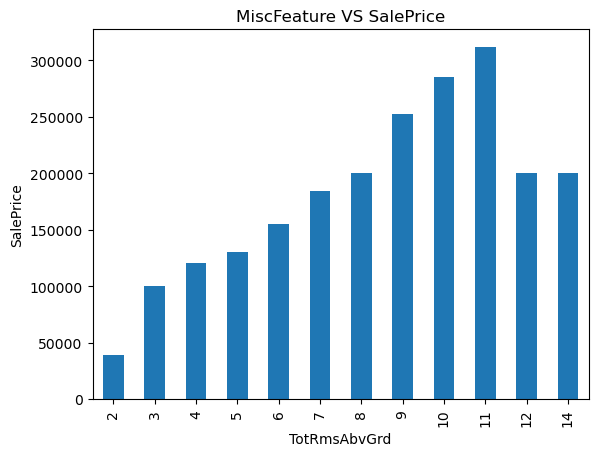

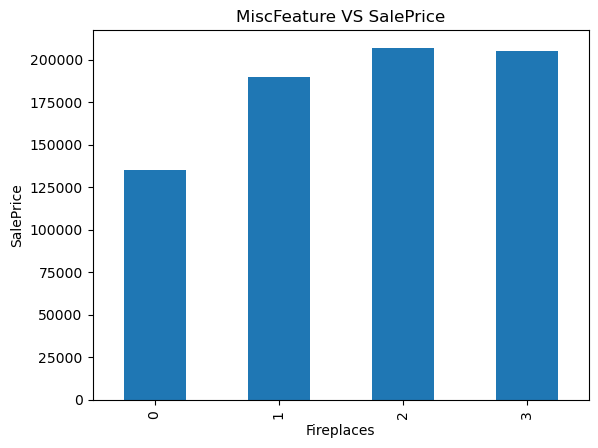

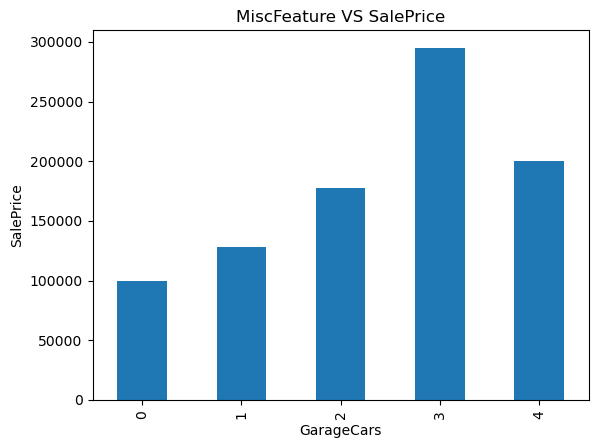

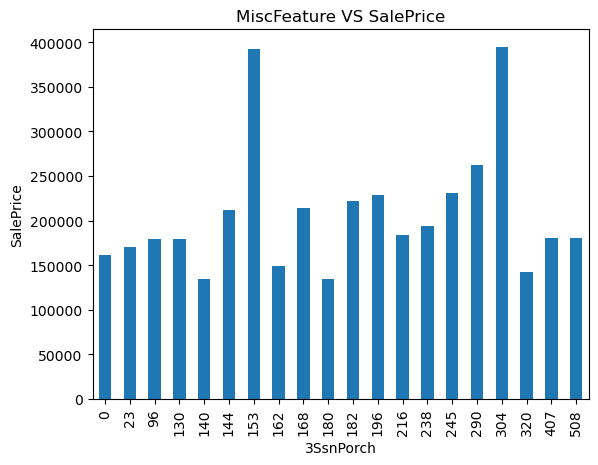

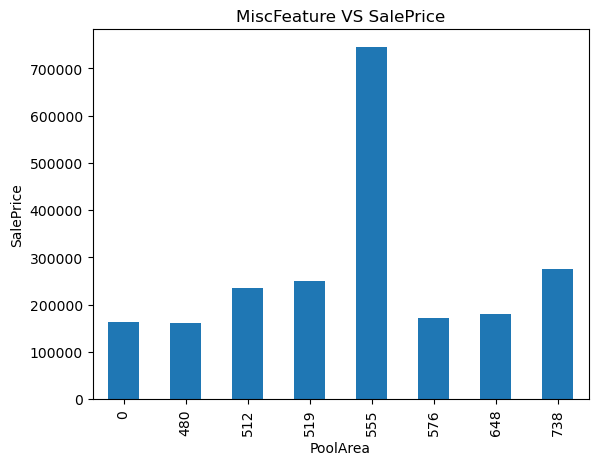

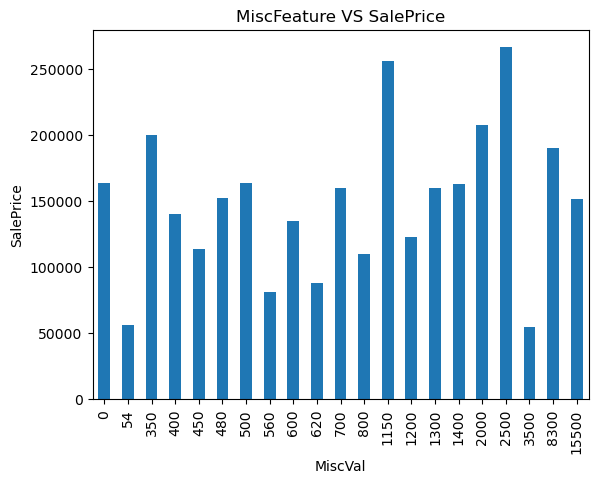

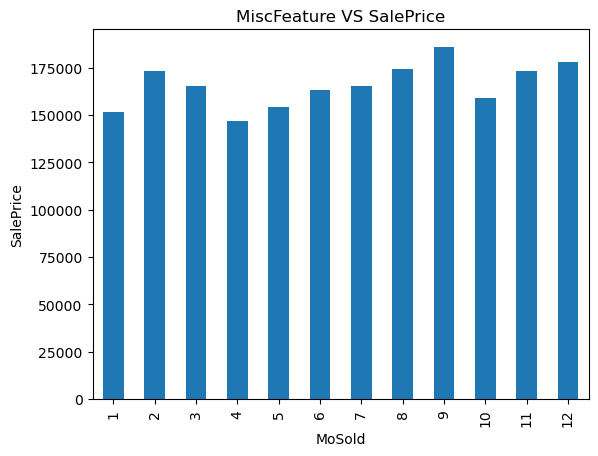

In [97]:
# Plotting 

for features in descrete_features:
    data4 = train_df.copy()
    data4.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.title(feature + ' VS SalePrice')
    plt.show()

    Conclude: As OverallQual increases, SalesPrice Increases
OverallQual: Rates the overall material and finish of the house

             In the end of LowQualFinSF, the SalePrice is highest
LowQualFinSF: Low quality finished square feet (all floors)

#

In [98]:
# Continous Varibale 
continous_feature = [features for features in numerical_features if features not in descrete_features+ year_features+['id']]
print("Total continous_features: " , len(continous_feature))

Total continous_features:  17


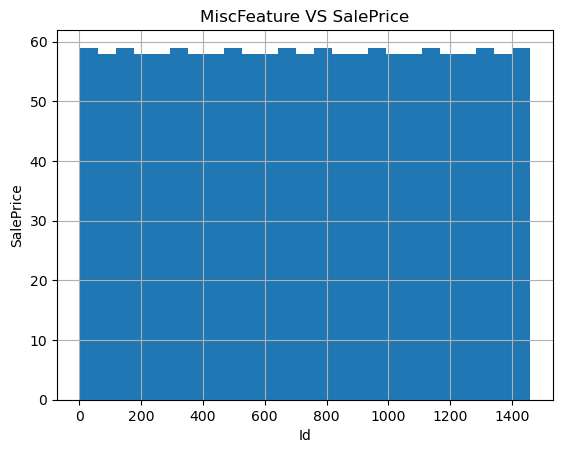

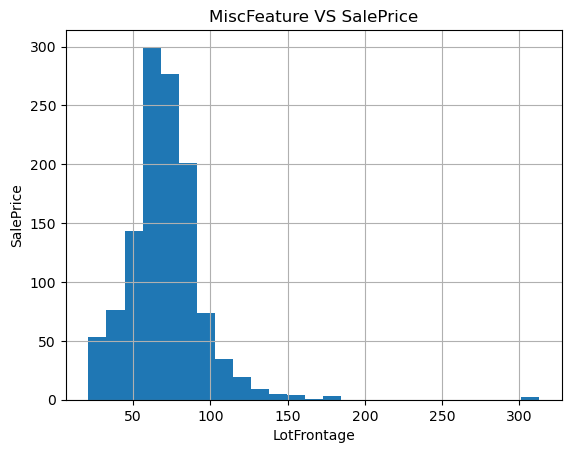

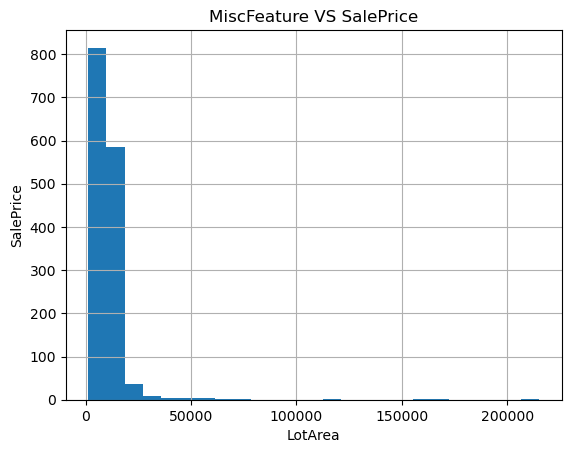

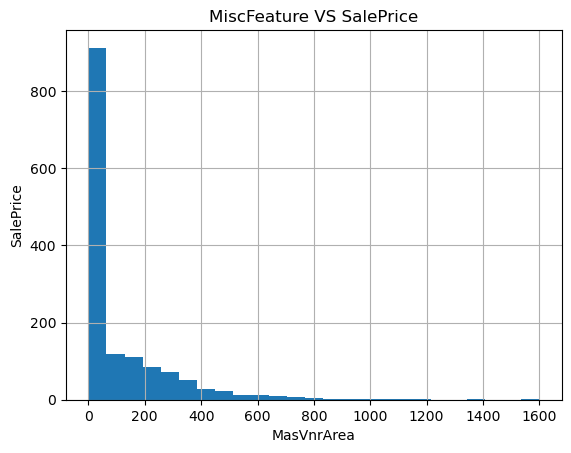

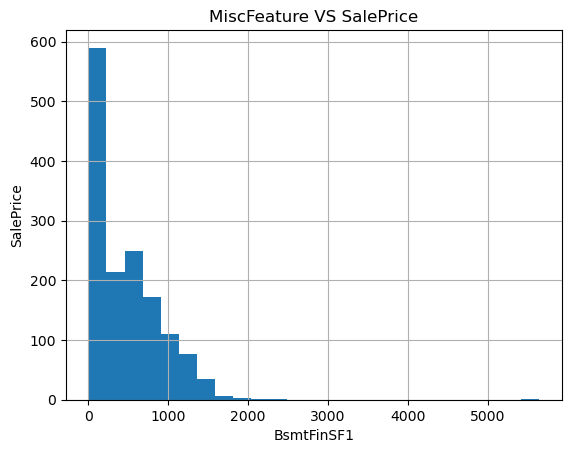

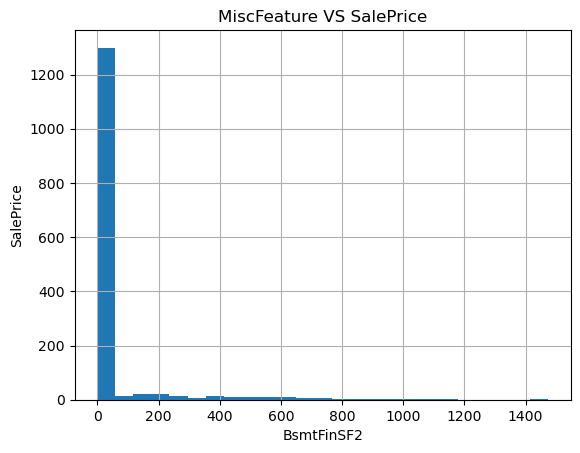

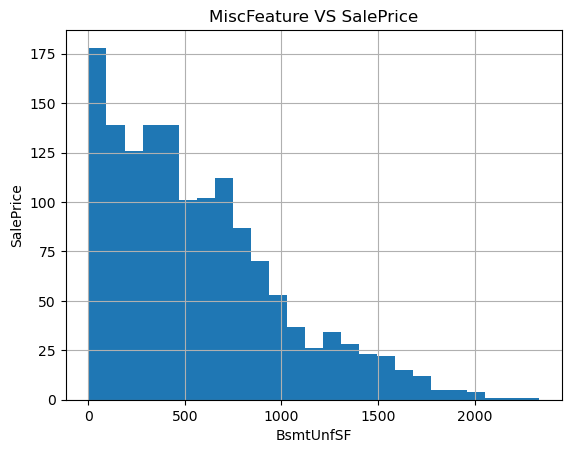

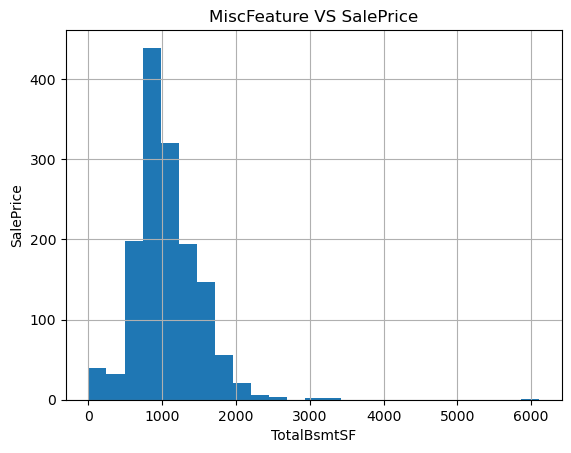

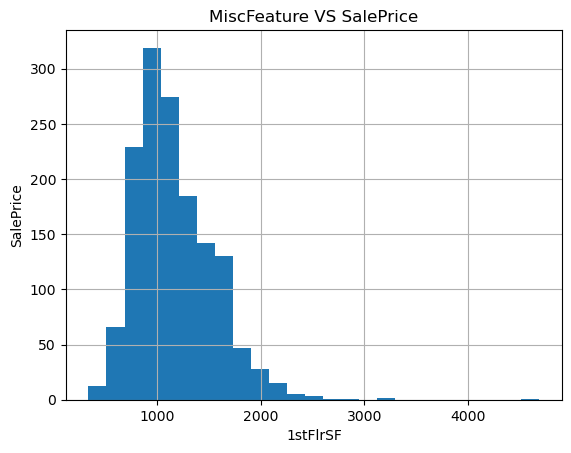

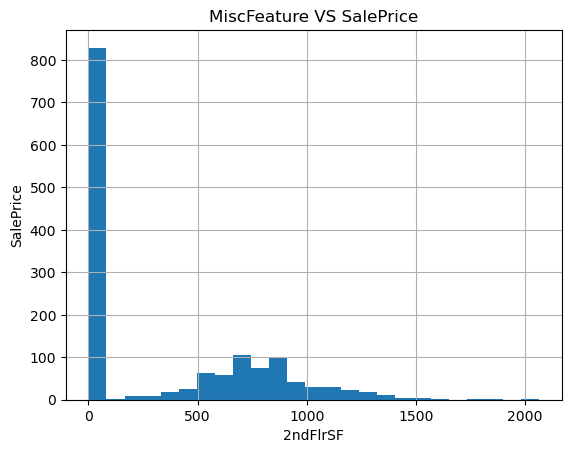

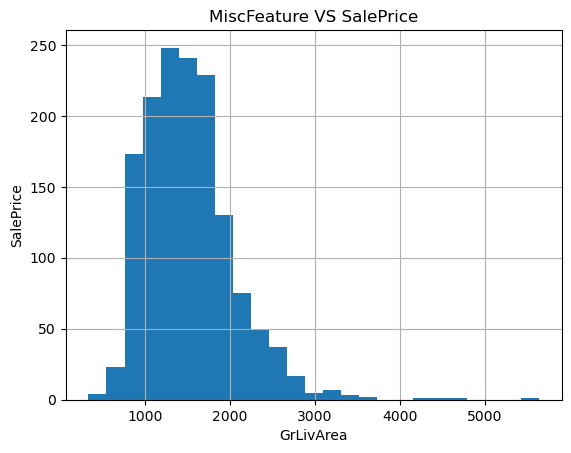

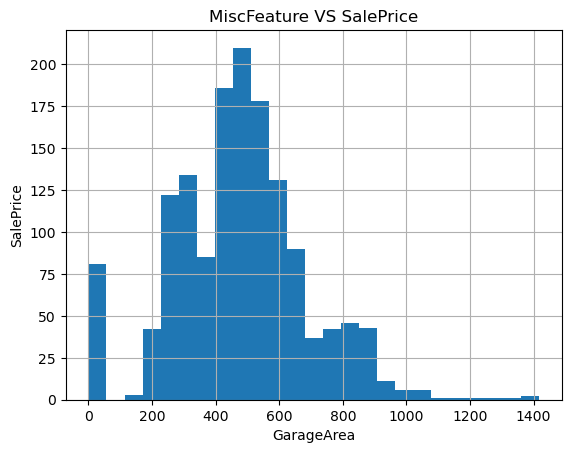

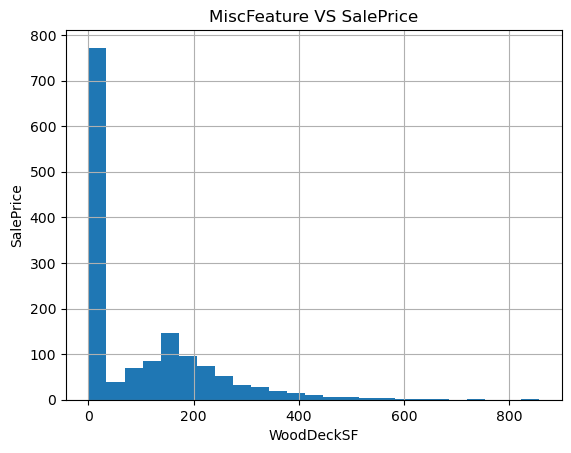

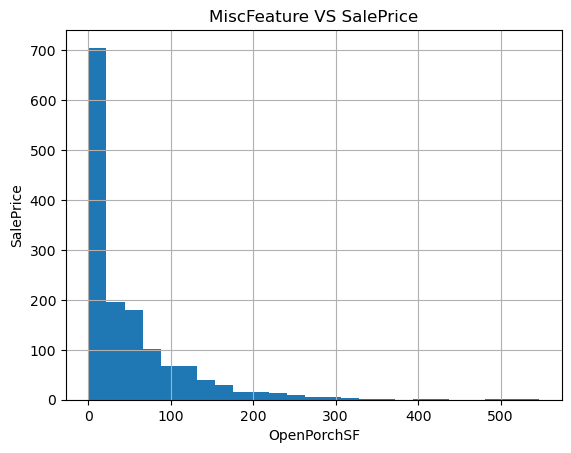

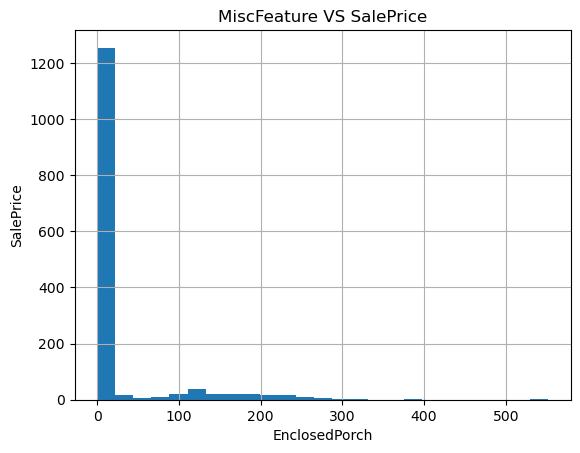

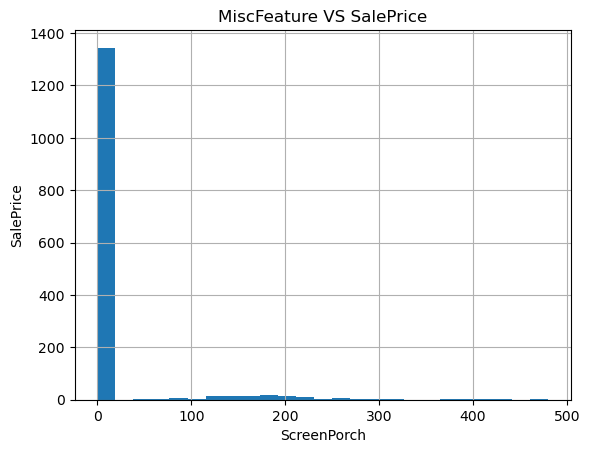

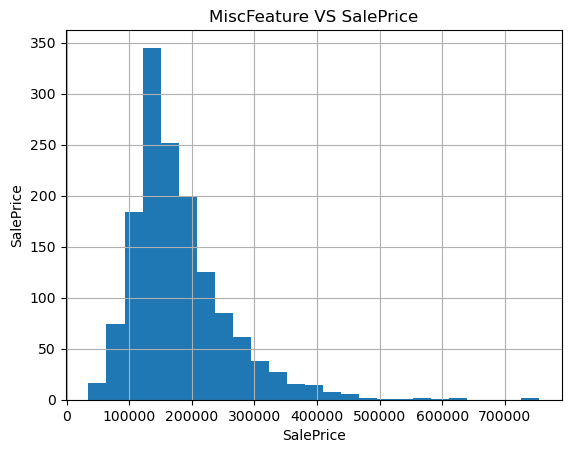

In [99]:
# Plotting for continous, we build histogram 

for features in continous_feature:
    data5 = train_df.copy()
    data5[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.title(feature + ' VS SalePrice')
    plt.show()

#

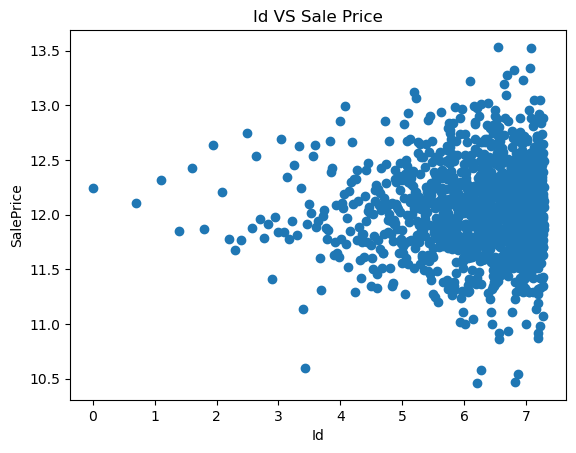

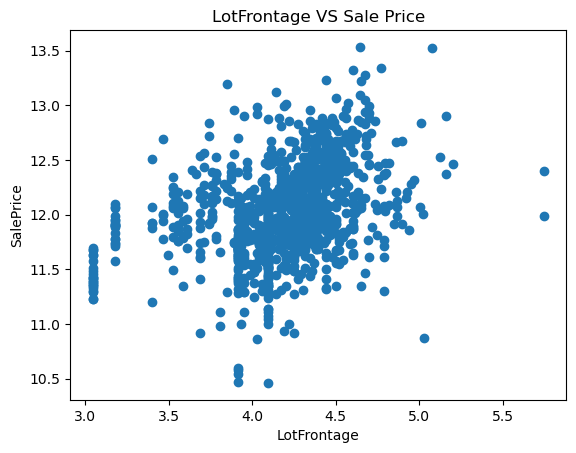

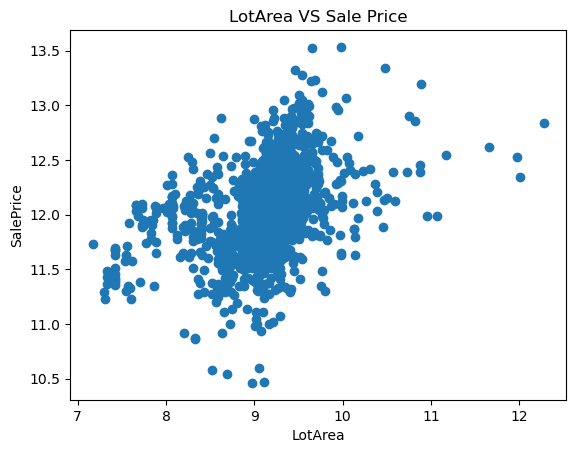

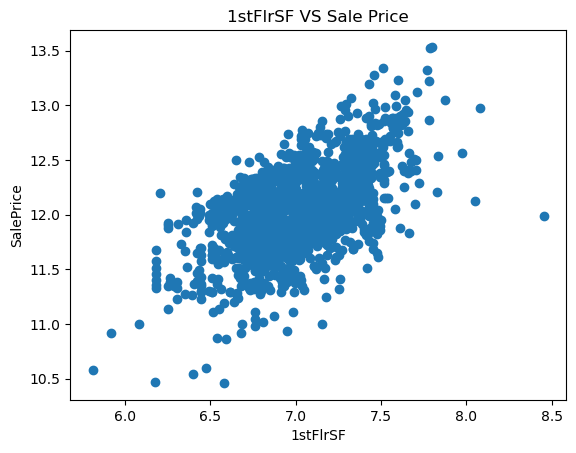

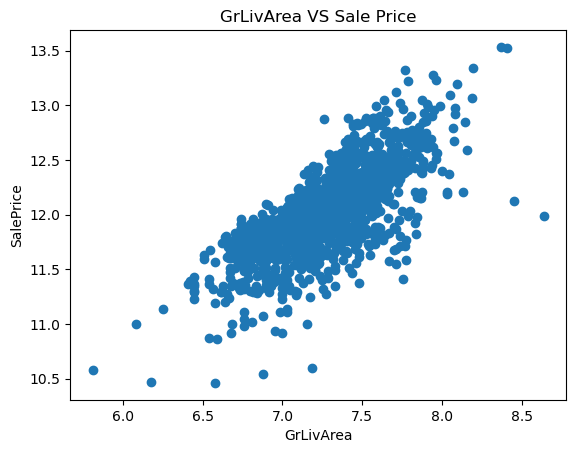

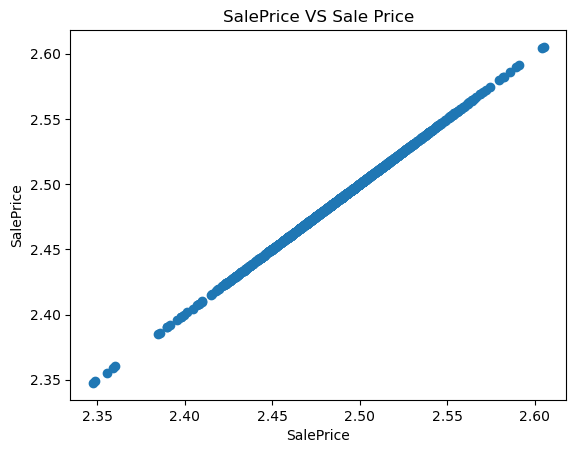

In [101]:
# Logarithmic Transformation for continous Feature

for features in continous_feature:
    data5 = train_df.copy()
    if 0 in data5[features].unique():
        pass
    else:
        data5[features] = np.log(data5[features])
        data5['SalePrice'] = np.log(data5['SalePrice'])
        plt.scatter(data5[features], data5['SalePrice'])
        plt.xlabel(features)
        plt.ylabel("SalePrice")
        plt.title(features + " VS Sale Price")
        plt.show()


    Conclude: All these features are sacled equally using logarihtm transformation

#

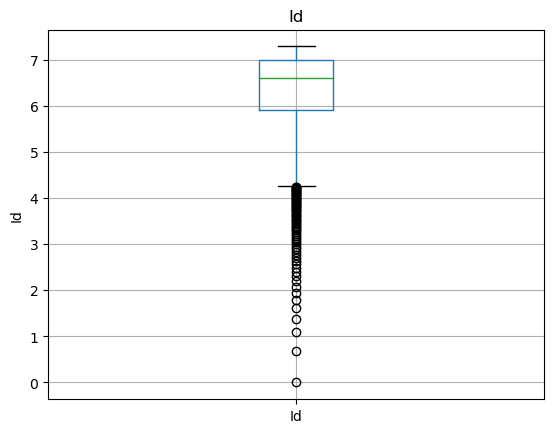

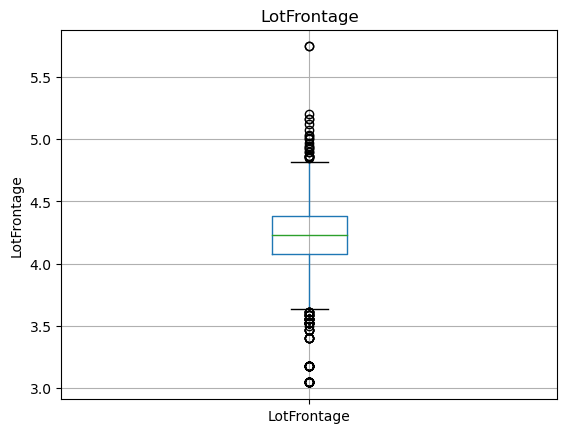

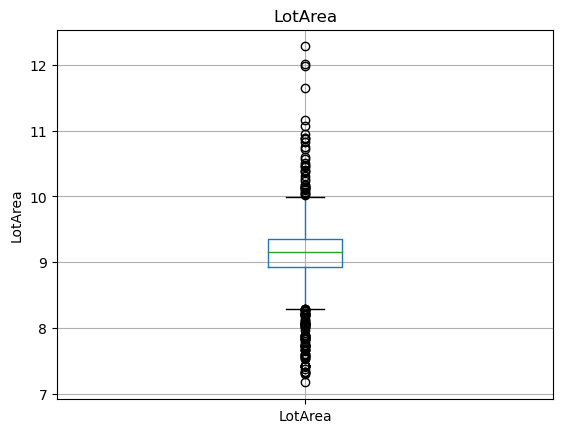

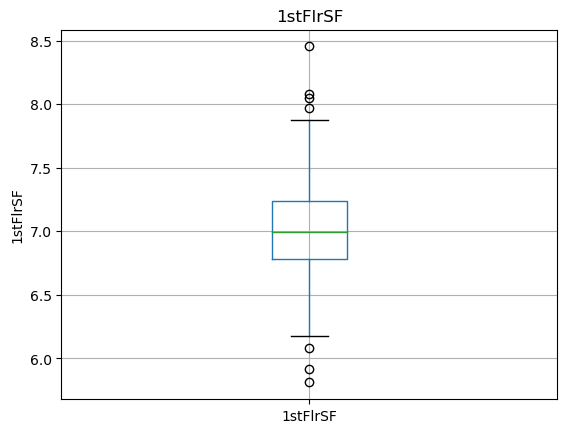

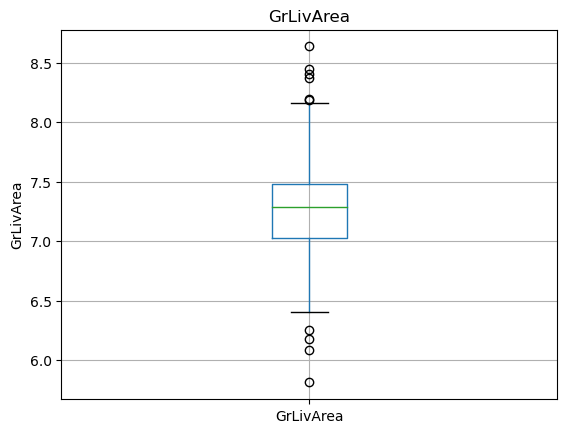

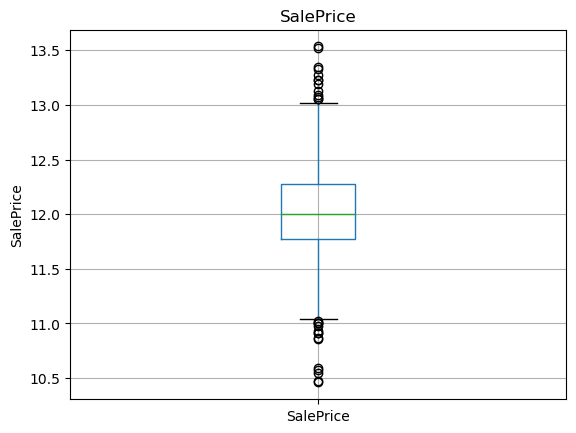

In [102]:
# Outlier - boxplot

for features in continous_feature:
    data5 = train_df.copy()
    if 0 in data5[features].unique():
        pass
    else:
        data5[features] = np.log(data5[features])
        data5.boxplot(column = features)
        plt.ylabel(features)
        plt.title(features)
        plt.show()

    Conclude: These are many outliers
   

#

In [110]:
# Categorical Features

categorical_features = [features for features in train_df.columns if train_df[features].dtypes == 'O']
train_df[categorical_features].head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [113]:
# Cardinalty- how many dfferent categories each features has

for feature in categorical_features:
    print("Unique values for", feature, ": ", train_df[feature].unique())
    print("\n")

Unique values for MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH']


Unique values for Street :  ['Pave' 'Grvl']


Unique values for Alley :  [nan 'Grvl' 'Pave']


Unique values for LotShape :  ['Reg' 'IR1' 'IR2' 'IR3']


Unique values for LandContour :  ['Lvl' 'Bnk' 'Low' 'HLS']


Unique values for Utilities :  ['AllPub' 'NoSeWa']


Unique values for LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


Unique values for LandSlope :  ['Gtl' 'Mod' 'Sev']


Unique values for Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Unique values for Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Unique values for Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


Unique values for BldgType :  ['1Fam' '2fmCon' 'Duplex' 'Twnhs

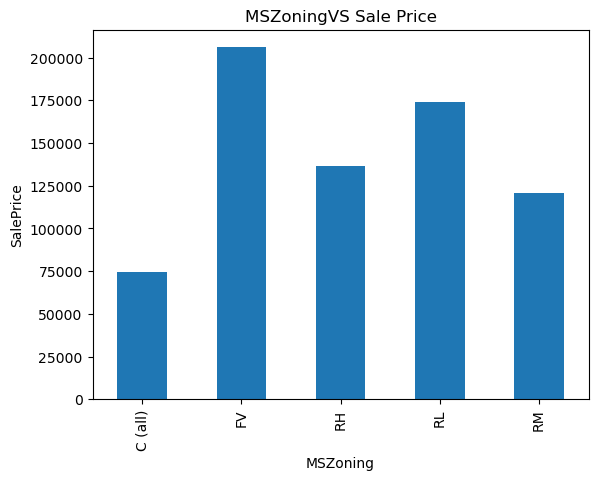

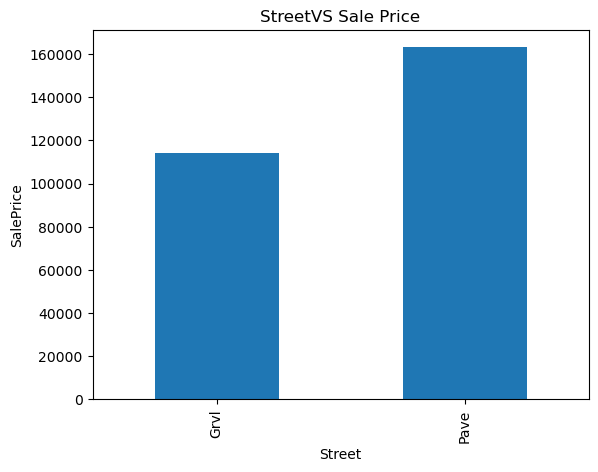

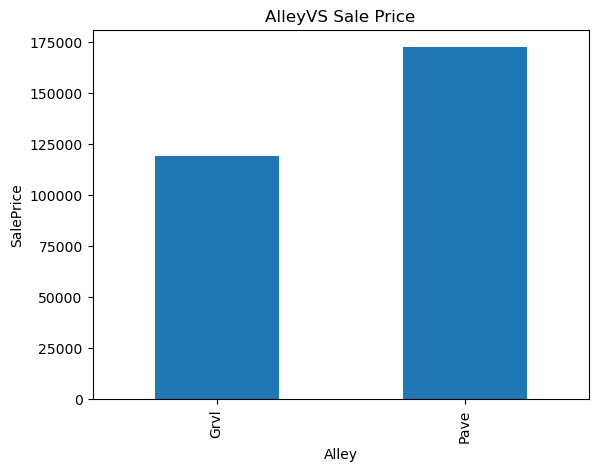

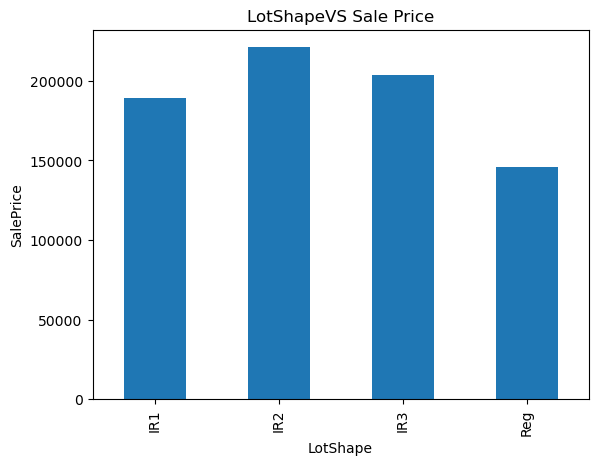

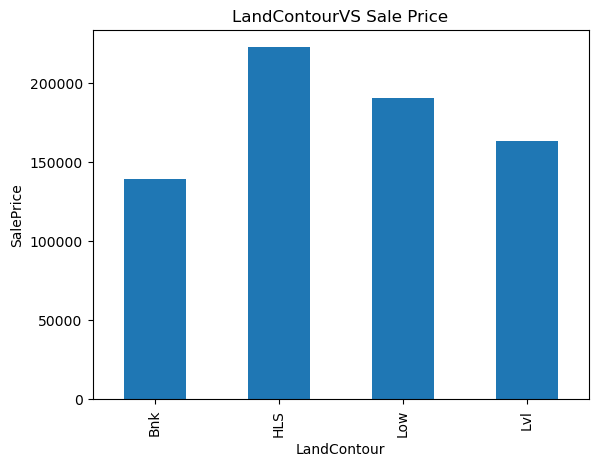

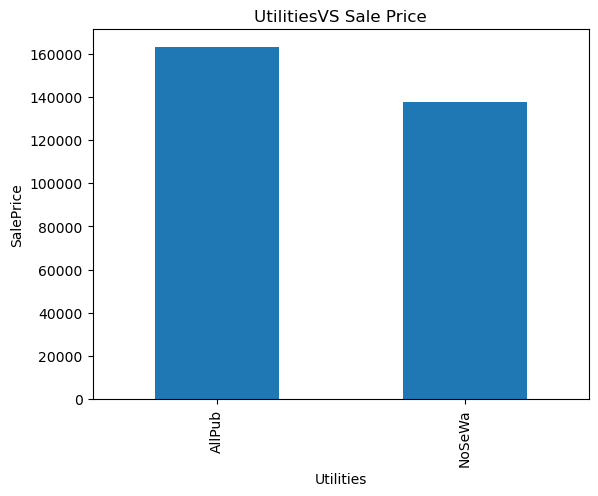

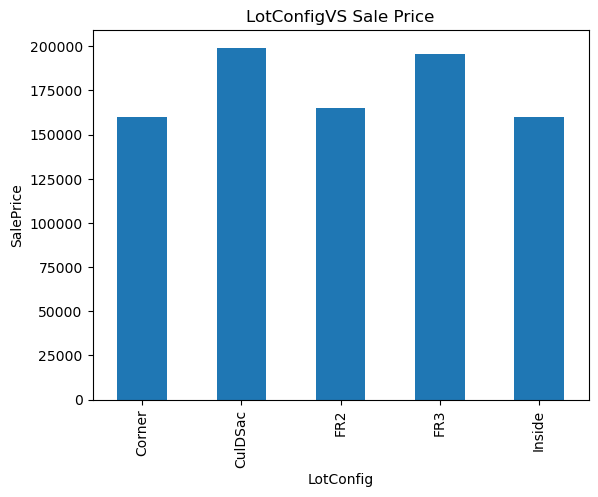

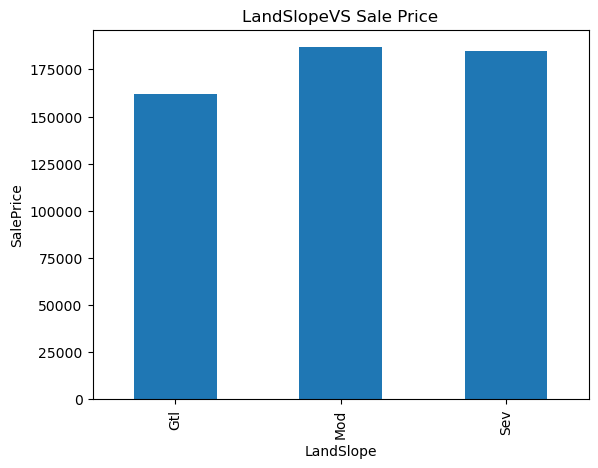

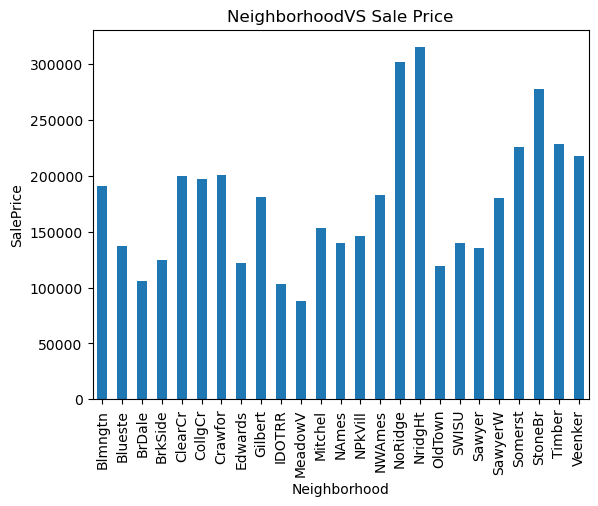

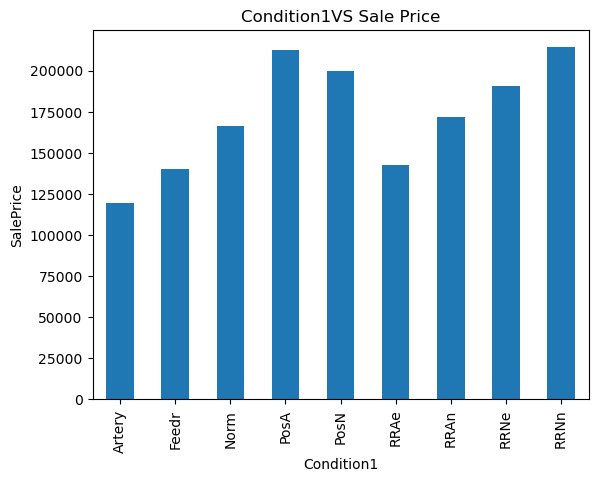

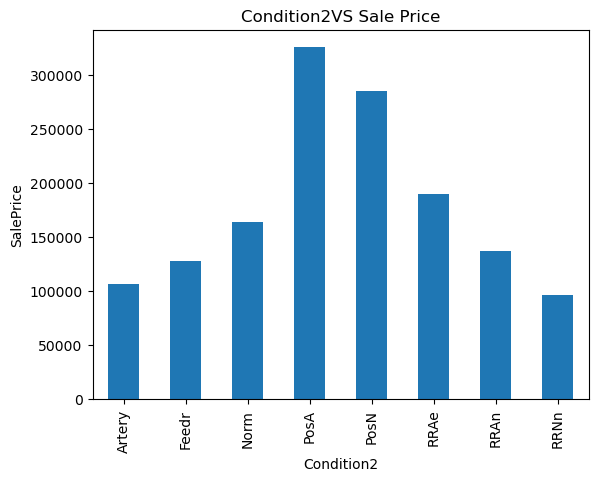

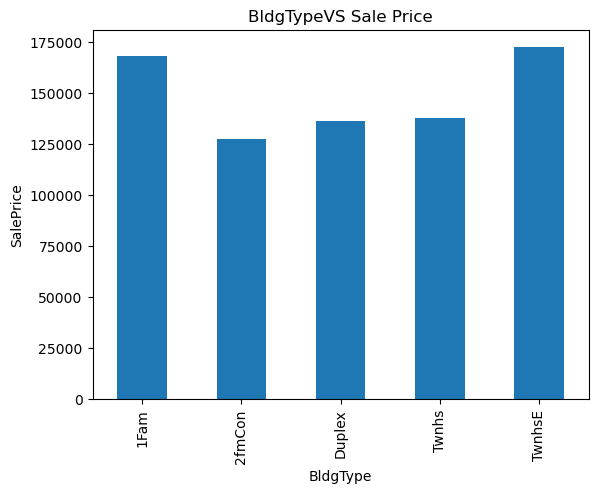

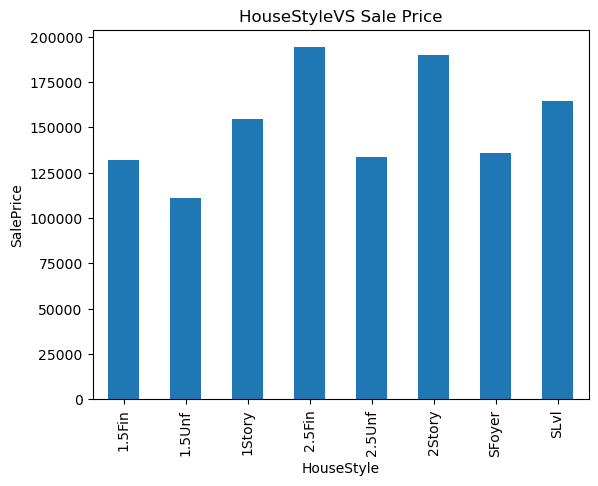

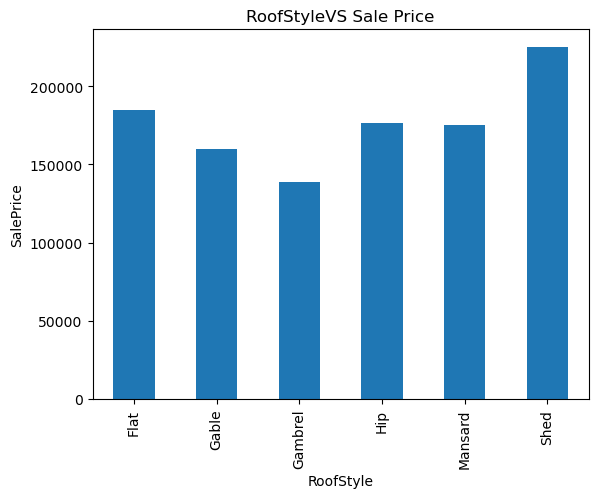

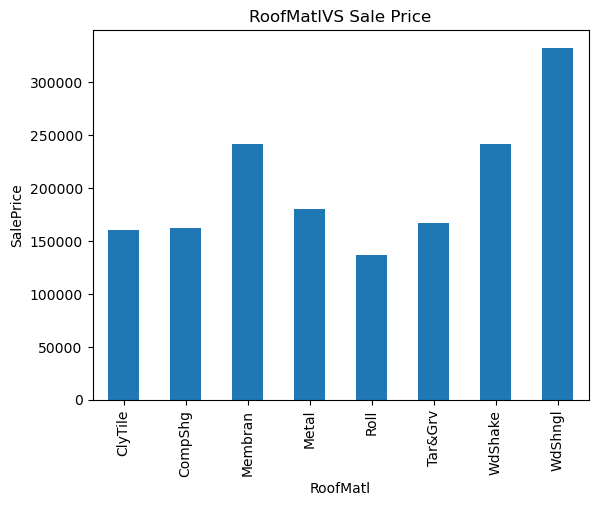

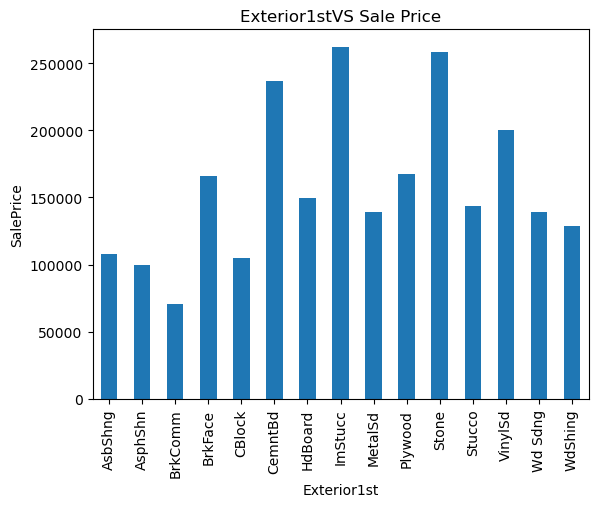

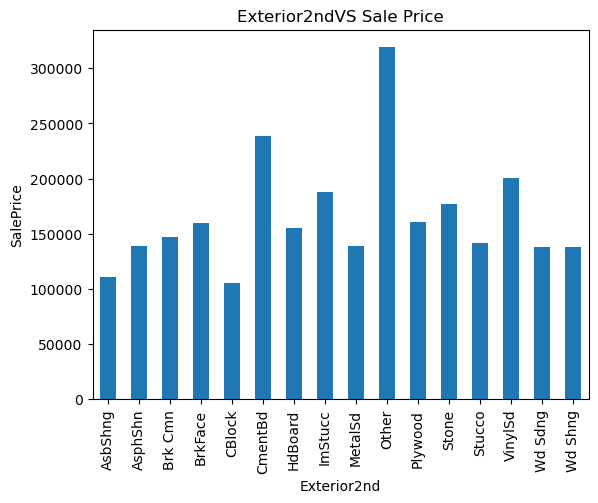

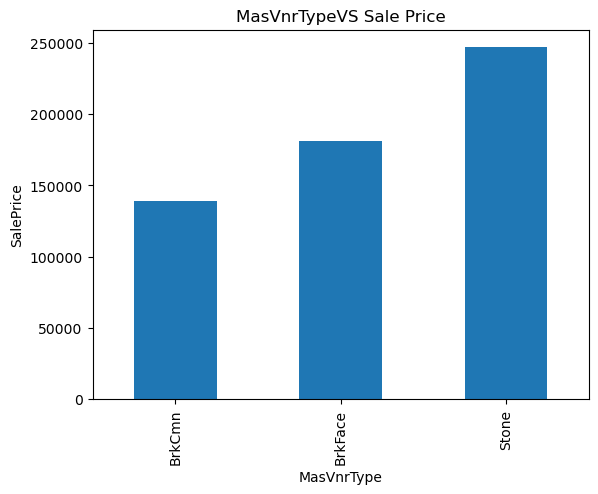

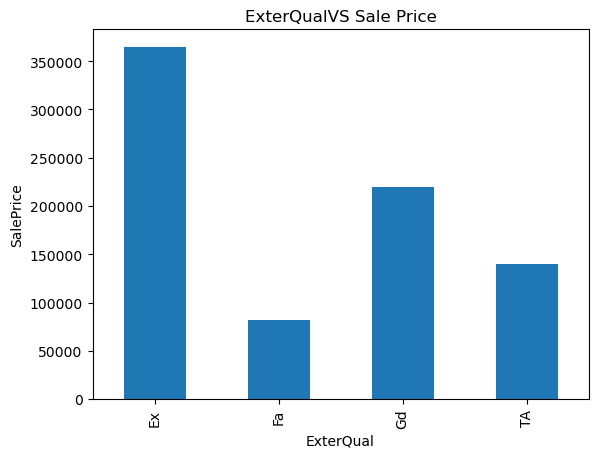

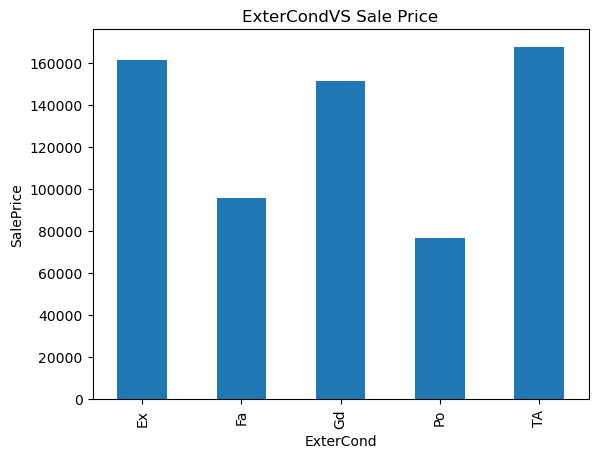

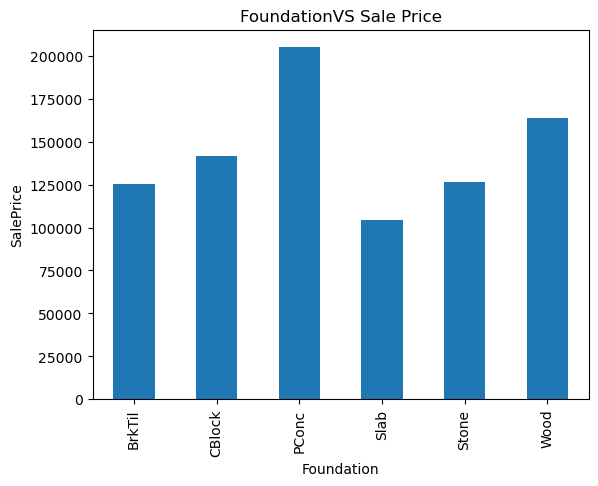

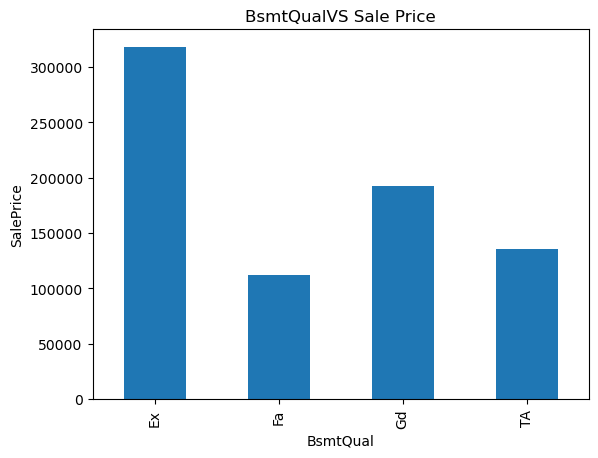

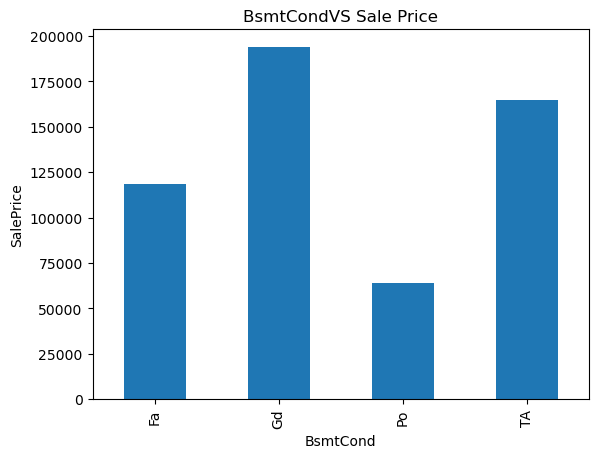

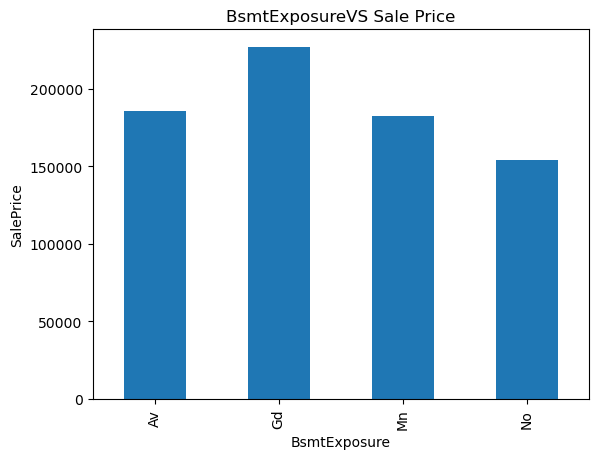

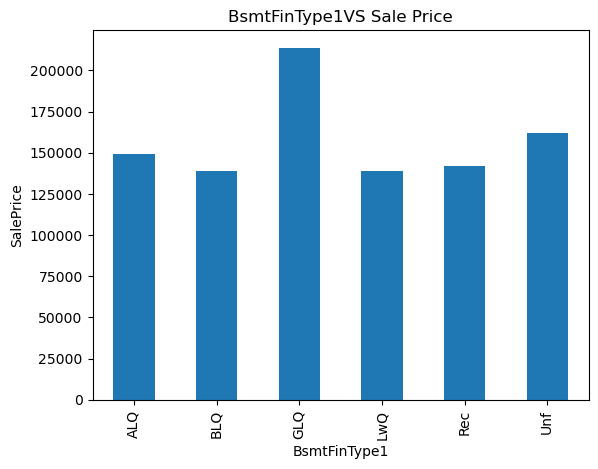

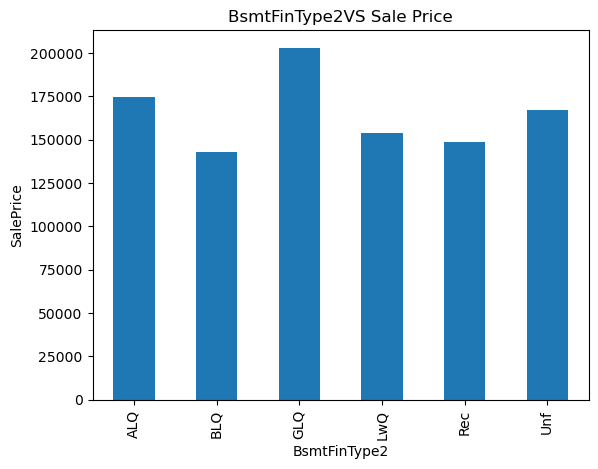

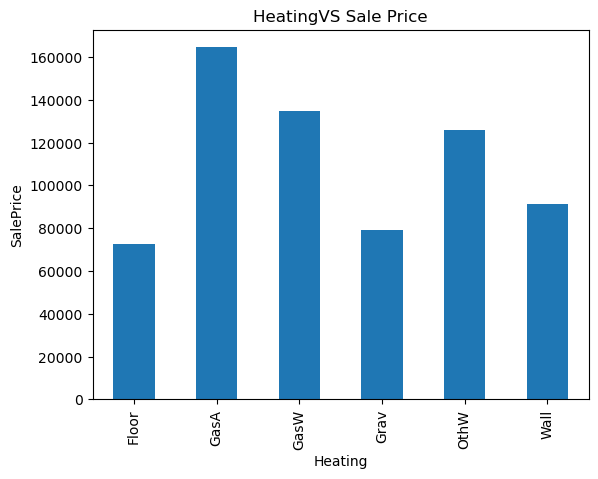

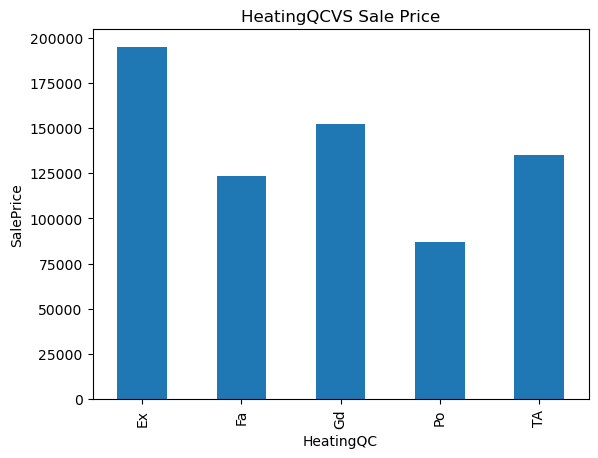

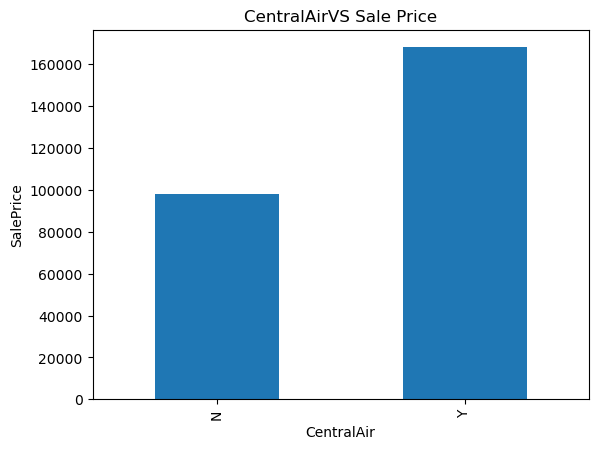

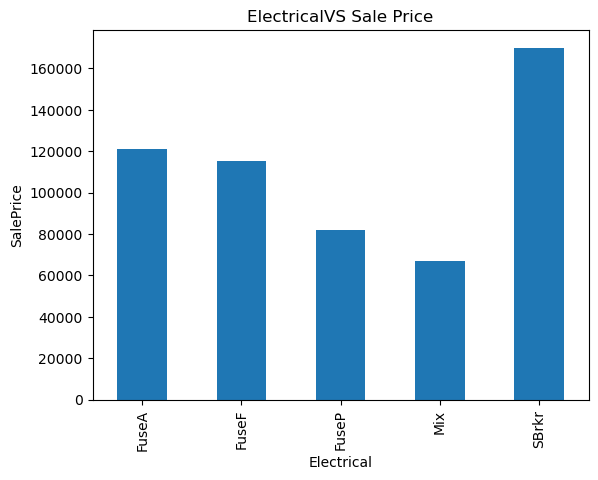

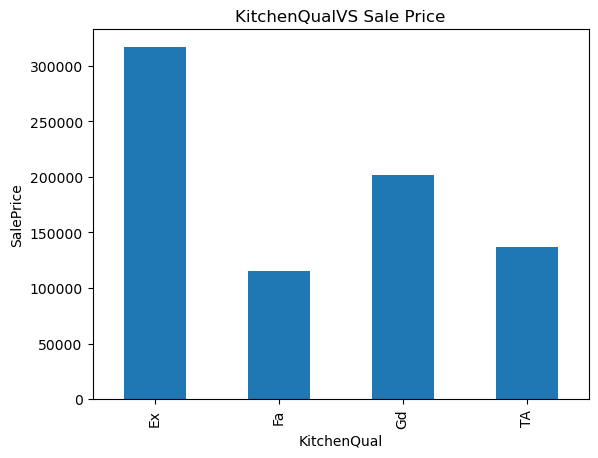

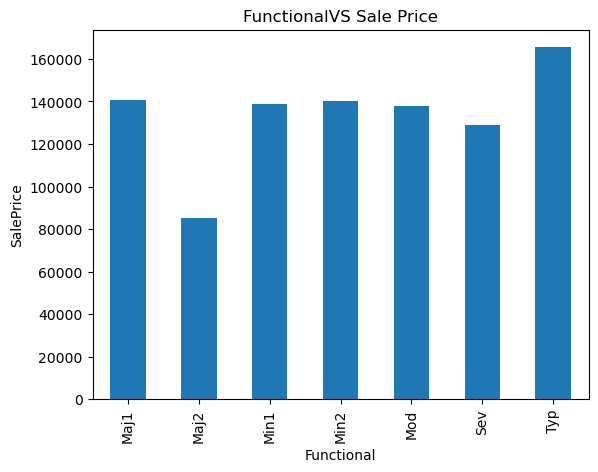

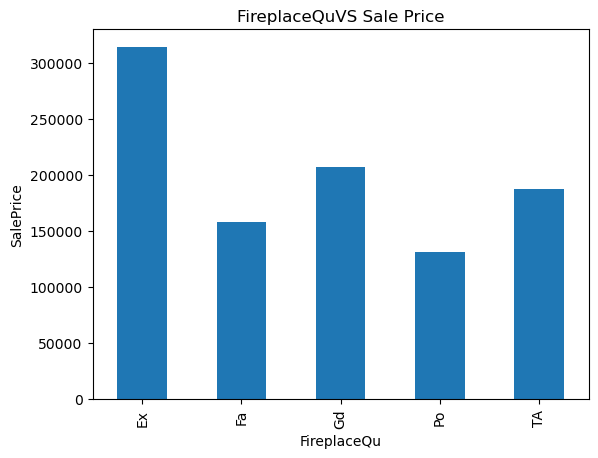

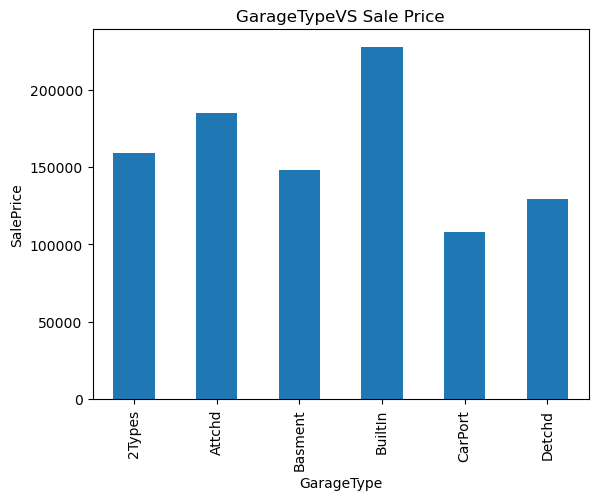

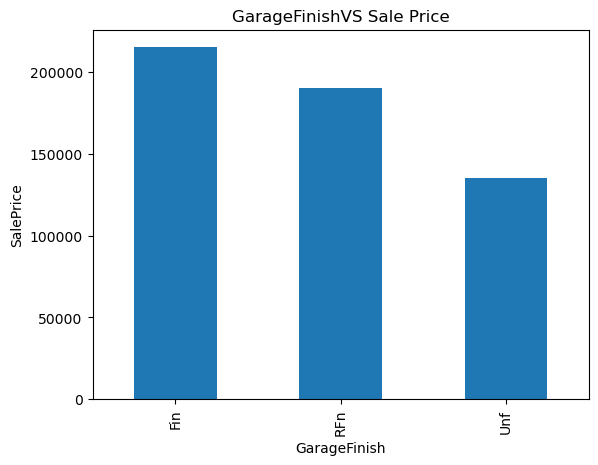

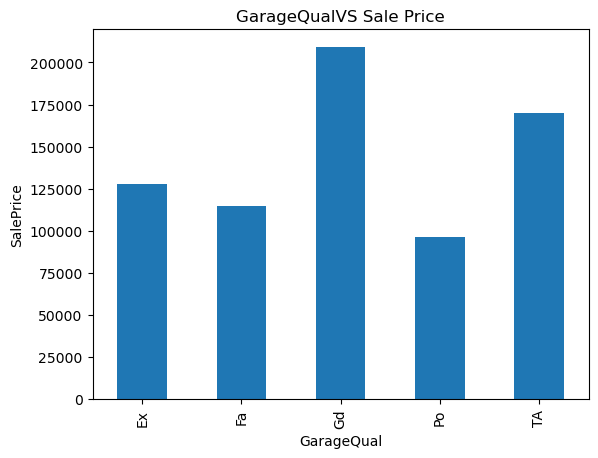

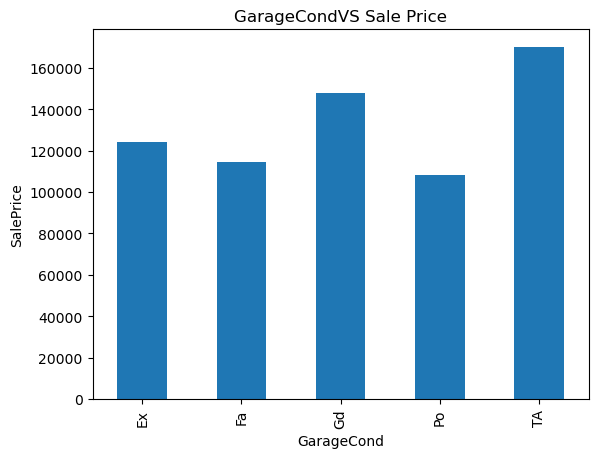

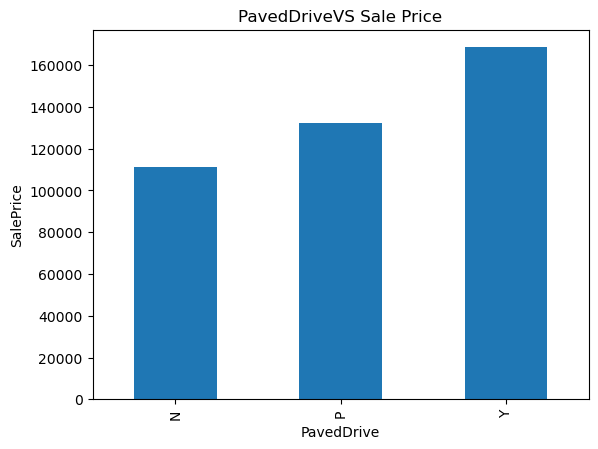

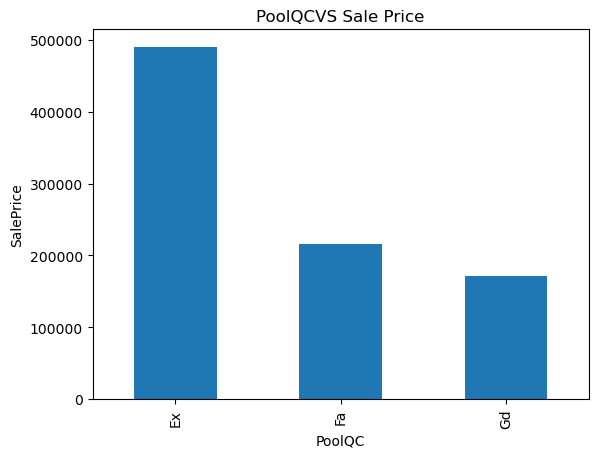

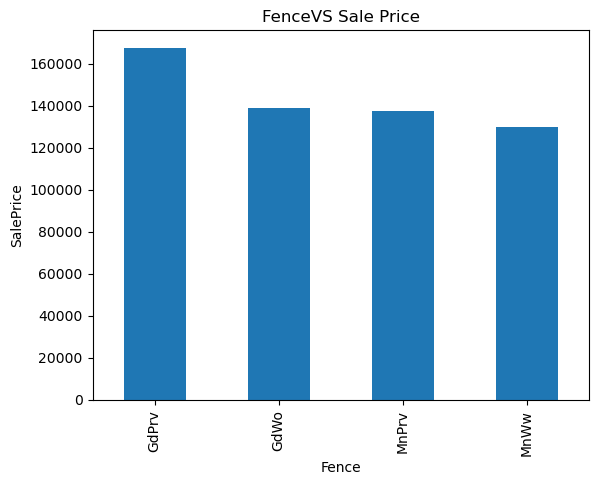

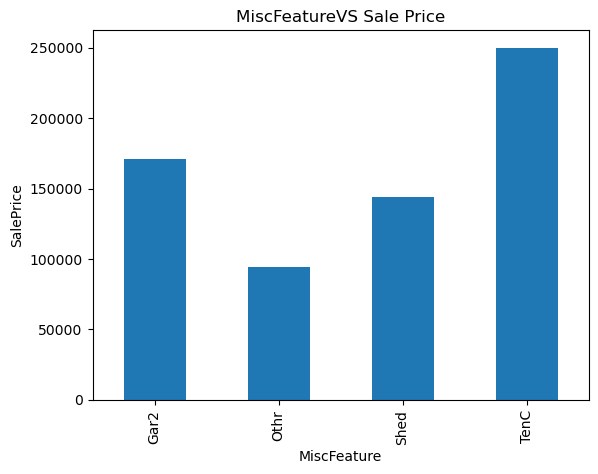

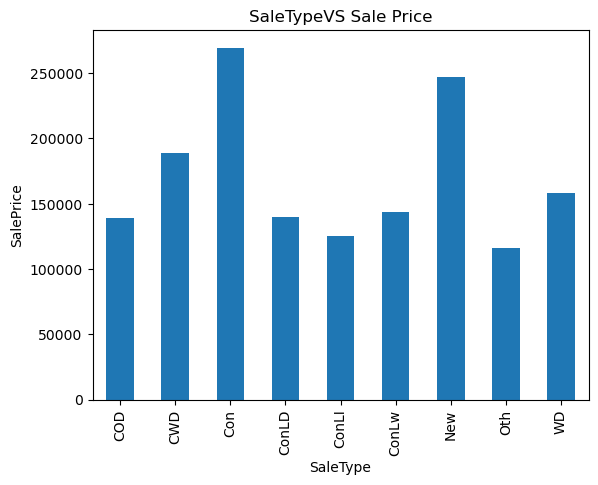

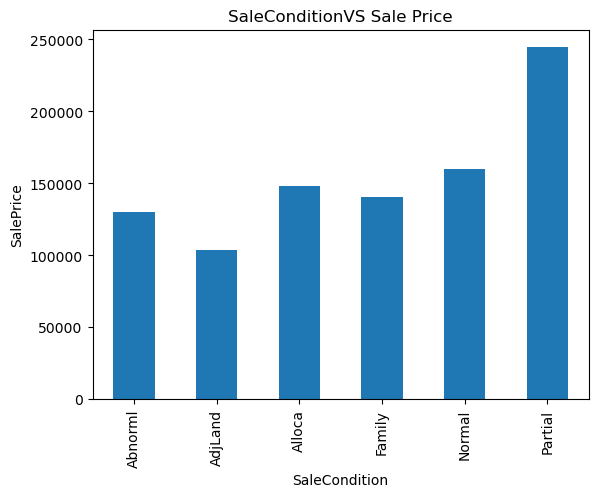

In [116]:
# Relatonship btw Categorical Features and target variable

for features in categorical_features:
    data6 = train_df.copy()
    data6.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.title(features + 'VS Sale Price')
    plt.show()

    Conclude: These all make sense and none of them seems useless

 #

In [146]:
# Missing Values
# Number of features with missing values - Categorical features
categorical_features_with_null_values =  [features for features in train_df.columns if train_df[features].isnull().sum() > 1 and train_df[features].dtypes == 'O']
#percentage of values in the missing features 
for feature in features_with_null_values:
    print(feature, "=",np.round(train_df[feature].isnull().mean() , 4), '%' )

LotFrontage = 0.0 %
MasVnrArea = 0.0 %
GarageYrBlt = 0.0 %


In [147]:
# Replace missing values with a new label 

def replace_cat_features(data, name_features):
    data7 = data.copy()
    data7[name_features] = data7[name_features].fillna('Mising')
    return data7

train_df = replace_cat_features(train_df,categorical_features_with_null_values)
train_df[features_with_null_values].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [148]:
data8.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Mising,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Mising,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Mising,Mising,Mising,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Mising,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Mising,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Mising,Mising,Mising,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Mising,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Mising,Mising,Mising,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Mising,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Mising,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Mising,Mising,Mising,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Mising,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Mising,Mising,Mising,0,12,2008,WD,Normal,250000


In [149]:
# Missing Values
# Number of features with missing values - Numerical Featres
numerical_features_with_null_values =  [features for features in train_df.columns if train_df[features].isnull().sum() > 1 and train_df[features].dtypes != 'O']
#percentage of values in the missing features 
for feature in features_with_null_values:
    print(feature, "=",np.round(train_df[feature].isnull().mean() , 4), '%' )

LotFrontage = 0.0 %
MasVnrArea = 0.0 %
GarageYrBlt = 0.0 %


In [155]:
# Replace missing values with a median value or 1 or 0

for feature in numerical_features_with_null_values:
    #calculate median
    median_c = train_df[feature].median()
    
    #create new feature to capture nan values
    # if nan- replace it with 1
    # else - 0 
    train_df[feature +'nan'] = np.where(train_df[feature].isnull(),1,0)
    train_df[feature].fillna(median_c, inplace=True)

train_df[numerical_features_with_null_values].isnull().sum()

Series([], dtype: float64)

In [156]:
train_df.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Mising,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Mising,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Mising,Mising,Mising,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Mising,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Mising,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Mising,Mising,Mising,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Mising,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Mising,Mising,Mising,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Mising,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Mising,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Mising,Mising,Mising,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Mising,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Mising,Mising,Mising,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Mising,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,Mising,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Mising,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Mising,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Mising,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Mising,Mising,Mising,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Mising,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Mising,Mising,Shed,350,11,2009,WD,Normal,200000,0,0,0
8,9,50,RM,51.0,6120,Pave,Mising,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,Mising,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Mising,Mising,Mising,0,4,2008,WD,Ab

In [157]:
# Now lets check with DateTime variable 

for feature in year_features:
    train_df[feature] = train_df['YrSold'] - train_df[feature]

In [159]:
train_df[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,0
1,31,31,31.0,0
2,7,6,7.0,0
3,91,36,8.0,0
4,8,8,8.0,0
